In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Connect data**

In [2]:
df=pd.read_csv('/content/bestsellers_books.csv')

# **Explore Data**

In [3]:
#appear name columns
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [4]:
# appear data sample
df.sample(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
2185,The Sun and Her Flowers,Edward Klein,4.3,26121.0,5.0,2016.0,Non Fiction
7451,Being Mortal: Medicine and What Matters in the...,Keith Richards,3.7,9398.0,NaN,NaN,Fiction
6455,The China Study: The Most Comprehensive Study ...,The Washington Post,4.7,NaN,12.0,2019.0,Non Fiction
3022,Drive: The Surprising Truth About What Motivat...,Ree Drummond,4.9,NaN,39.0,"$2,018.00",Fiction
7273,Watchmen,Dvaid Zinczenko,4.4,8270.0,6.0,NaN,Fiction
8737,Harry Potter Coloring Book,Ann Voskamp,3.5,NaN,39.0,2017.0,Fiction
10022,Go the F**k to Sleep,Sarah Palin,3.8,"$18,553.00",46.0,2009.0,Non Fiction
7412,The Girl Who Played with Fire (Millennium),NaN,4.1,26205.0,49.0,2012.0,Fiction
6707,Dover Creative Haven Art NouveauA nimal Design...,Bill O'Reilly,3.7,1239.0,33.0,NaN,Fiction
7502,Water for Elephants: A Novel,American Psychological Association,3.8,21274.0,NaN,2010.0,Non Fiction


In [5]:
#Know size data
df.shape

(10500, 7)

Size df rows and columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         9475 non-null   object
 1   Author       9429 non-null   object
 2   User Rating  9470 non-null   object
 3   Reviews      9438 non-null   object
 4   Price        9470 non-null   object
 5   Year         9438 non-null   object
 6   Genre        9414 non-null   object
dtypes: object(7)
memory usage: 574.3+ KB


Problem (Reviews- Price ) object and find null

In [7]:
# number unique Name column
df["Name"].nunique()

779

Name column 779 numbers unique

In [8]:
# number unique Author column
df["Author"].nunique()

646

Author column 646 numbers unique

In [9]:
# number unique User Rating column
df["User Rating"].unique()

array(['4.7', '4.6', '4.8', '4.4', '4.5', nan, '3.9', '4.3', '4.2', '4.9',
       '$4.50', '$4.70', '$4.40', '3.8', '$4.60', '4.0', '4.1', '$4.90',
       '$4.10', '$4.80', '3.3', '$4.20', '3.5', '3.7', '$3.60', '3.6',
       '5.0', '$4.00', '$3.70', '$3.80', '$4.30', '$3.90', '$5.00',
       '$3.50'], dtype=object)

problem nan and $

In [10]:
# use str.replace
df["User Rating"]=df["User Rating"].str.replace("$","")

remove $  

In [11]:
#check User Rating column
df["User Rating"].unique()

array(['4.7', '4.6', '4.8', '4.4', '4.5', nan, '3.9', '4.3', '4.2', '4.9',
       '4.50', '4.70', '4.40', '3.8', '4.60', '4.0', '4.1', '4.90',
       '4.10', '4.80', '3.3', '4.20', '3.5', '3.7', '3.60', '3.6', '5.0',
       '4.00', '3.70', '3.80', '4.30', '3.90', '5.00', '3.50'],
      dtype=object)

no find $

In [12]:
# number unique Genre column
df["Genre"].unique()

array(['Non Fiction', 'Fiction', 'Fitcion', 'Ficiton', nan, 'Non Fcition',
       'Fictoin', 'oNn Fiction', 'No nFiction', 'Non Fitcion',
       'Non iFction', 'Fcition', 'Nno Fiction', 'iFction', 'Fictino',
       'Non Ficiton', 'Non Fictoin', 'NonF iction', 'Non Fictino'],
      dtype=object)

Genre column has Non Fictoin and Fictoin

In [13]:
def clean_genre(genre):
    genre = str(genre).strip().lower() #

    # Standardize Fiction variations
    if 'fiction' in genre or 'fict' in genre or 'fitc' in genre:
        if 'non' in genre or 'no n' in genre or 'nno' in genre:
            return 'Non Fiction'
        else:
            return 'Fiction'

    return np.nan  # for any unrecognized formats

# Apply cleaning
df['Genre'] = df['Genre'].apply(clean_genre)

# print
print(df['Genre'].unique())

['Non Fiction' 'Fiction' nan]


result Genre ( Non-Fiction and Fiction)

In [14]:
# use value_counts(dropna=False) konw value nan
genre_counts = df["Genre"].value_counts(dropna=False)
print(genre_counts)

Genre
Non Fiction    4694
Fiction        4518
NaN            1288
Name: count, dtype: int64


Genre column find 1288 null

In [15]:
# number unique Year column
df["Year"].unique()

array(['2016.0', '2011.0', '2018.0', '2017.0', '2019.0', '2014.0', nan,
       '2010.0', '2009.0', '2015.0', '2013.0', '$2,015.00', '2012.0',
       '$2,019.00', '$2,018.00', '$2,014.00', '$2,017.00', '$2,012.00',
       '$2,011.00', '$2,010.00', '$2,016.00', '$2,013.00', '$2,009.00'],
      dtype=object)

In [16]:
import re

def clean_year(year):

    if pd.isna(year):  # Handle NaN/None
        return np.nan

    #Remove($ , .00 etc.)
    year_str = re.sub(r'[\$,]|\.0+$', '', str(year))
    # Extract only digits
    year_str = re.sub(r'[^\d]', '', year_str)

    # Convert to integer (if valid), else return NaN
    try:
        return int(year_str) if year_str else np.nan
    except ValueError:
        return np.nan


# Apply cleaning function
df["Year"] = (
    df["Year"].apply(clean_year)      # Clean strings/currency → int/NaN
    .astype("Int64")                  # Convert to Pandas' nullable integer
)

print(df["Year"])

0        2016
1        2011
2        2018
3        2017
4        2019
         ... 
10495    2016
10496    2019
10497    2014
10498    2012
10499    2012
Name: Year, Length: 10500, dtype: Int64


In [17]:
df["Year"] = df["Year"].astype(str).replace("<NA>", pd.NA)
#df["Year"]=df["Year"].astype(str)

result object

In [18]:
# use value_counts(dropna=False) konw value nan
df["Year"].value_counts(dropna=False)

,count
Year,
<NA>,1062
2011,908
2015,885
2012,870
2019,865
2009,863
2016,856
2010,848
2014,846


result Year column has 1062 nan and range count number 820 to 908

In [19]:
# number unique Price column
df["Price"].unique()

array(['8.0', '$22.00', '15.0', '6.0', '12.0', '11.0', '30.0', '3.0',
       '2.0', nan, '5.0', '17.0', '4.0', '$8.00', '13.0', '14.0',
       '$14.00', '9.0', '$11.00', '24.0', '21.0', '0.0', '18.0', '28.0',
       '16.0', '10.0', '105.0', '22.0', '20.0', '1.0', '7.0', '$7.00',
       '32.0', '$5.00', '19.0', '54.0', '52.0', '25.0', '$6.00', '27.0',
       '$9.00', '46.0', '$46.00', '$17.00', '39.0', '53.0', '$15.00',
       '40.0', '36.0', '$82.00', '23.0', '$16.00', '42.0', '43.0', '38.0',
       '49.0', '34.0', '47.0', '37.0', '35.0', '26.0', '31.0', '33.0',
       '$21.00', '41.0', '29.0', '45.0', '44.0', '48.0', '$41.00',
       '$26.00', '$49.00', '$47.00', '$25.00', '$31.00', '$20.00',
       '$44.00', '$35.00', '$28.00', '$39.00', '$24.00', '$37.00',
       '$38.00', '$30.00', '$10.00', '$29.00', '$27.00', '$40.00',
       '$19.00', '$32.00', '$12.00', '$13.00', '$48.00', '$45.00',
       '$33.00', '$36.00', '$42.00', '$23.00', '$34.00', '$43.00',
       '$18.00'], dtype=objec

problem type object and $

In [20]:
df["Price"]=df["Price"].str.replace("$","")# remove $
df["Price"]=df["Price"].astype(float)# type float

In [21]:
# use value_counts(dropna=False) konw value nan
Price_counts = df["Price"].value_counts(dropna=False)
print(Price_counts)

Price
NaN      1030
12.0      243
8.0       242
13.0      237
9.0       233
17.0      232
43.0      230
5.0       229
14.0      229
10.0      228
6.0       226
26.0      223
36.0      221
40.0      220
16.0      219
28.0      218
25.0      218
24.0      216
39.0      215
15.0      214
11.0      213
30.0      212
41.0      209
46.0      209
48.0      208
21.0      208
49.0      207
7.0       207
33.0      207
47.0      206
37.0      201
20.0      199
23.0      199
19.0      195
18.0      194
31.0      194
22.0      192
34.0      188
29.0      187
44.0      187
32.0      185
35.0      185
42.0      184
38.0      184
45.0      184
27.0      175
4.0        32
0.0        12
2.0         6
105.0       2
3.0         1
82.0        1
1.0         1
53.0        1
54.0        1
52.0        1
Name: count, dtype: int64


result Price  column has 1030 nan

In [22]:
# number unique Reviews column
df["Reviews"].unique()

array(['17350.0', '2052.0', '18979.0', ..., '$1,651.00', '35437.0',
       '$7,855.00'], dtype=object)

find .00 - $

In [23]:
# use value_counts(dropna=False) konw value nan
df["Reviews"].value_counts(dropna=False)

,count
Reviews,
NaN,1062
5069.0,10
8580.0,9
19546.0,8
21834.0,8
...,...
6310.0,1
15921.0,1
798.0,1


result Reviews  column has 1062 nan

In [24]:
def clean_reviews(review):
    # Handle missing values
    if pd.isna(review):
        return np.nan

    # convert to string, remove $ and comma
    review = str(review).replace('$', '').replace(',', '').strip()

    # remove .0
    if '.' in review:
        review = review.split('.')[0]  # part ( 17350.0 → 17350)

    # convert to int if valid, else nan
    try:
        return int(review)
    except ValueError:
        return np.nan

# use def clean_reviews
df['Reviews'] = df['Reviews'].apply(clean_reviews)


In [25]:
df["Reviews"] = df["Reviews"].astype(float).astype('Int64') # Convert integer type
print(df["Reviews"].unique())
print(df["Reviews"].value_counts(dropna=False))

<IntegerArray>
[17350,  2052, 18979, 21424,  7665, 12643,  <NA>, 19699, 23848,   460,
 ...
 32115, 47003, 36042, 19391,  8901, 43675,  7941, 24671, 29591, 46700]
Length: 8096, dtype: Int64
Reviews
<NA>     1062
5069       10
8580        9
21834       8
19546       8
         ... 
28006       1
1101        1
45501       1
30075       1
13612       1
Name: count, Length: 8096, dtype: Int64


In [26]:
# use 3 columns check no find nall
columns_to_check = ["Name",'User Rating','Author']

# Filter rows where ALL 3 columns are not null
df_clean = df.dropna(subset=columns_to_check, how='any')

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_clean.shape}")
print(f"Rows dropped: {len(df) - len(df_clean)}")

Original shape: (10500, 7)
Filtered shape: (7670, 7)
Rows dropped: 2830


result
*   Original shape: (10500, 7)
*   Filtered shape: (7670, 7)
*   Rows dropped: 2830







In [27]:
# check duplicated
df_clean.duplicated().sum()

np.int64(330)

result duplicated 330 rows

In [28]:
#Remave duplicated
df_clean.drop_duplicates(inplace=True)

<ipython-input-28-7f806a39198a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(inplace=True)


In [29]:
#confirm removing duplicates
df_clean.duplicated().sum()

np.int64(0)

result 0 rows

In [30]:
# size data
df_clean.shape

(7340, 7)

size data (7340, 7)

In [31]:
# check all columns null
nan=df_clean.isna().sum().sort_values()
nan

,0
Name,0
Author,0
User Rating,0
Year,730
Price,731
Reviews,745
Genre,894


Genre , Reviews , Year and Price are null

In [32]:
#Percentage of Nulls per Column
nan_percentage = (df_clean.isnull().sum() / len(df)) * 100
print("\nPercentage of Nulls per Column:")
print(nan_percentage)


Percentage of Nulls per Column:
Name           0.000000
Author         0.000000
User Rating    0.000000
Reviews        7.095238
Price          6.961905
Year           6.952381
Genre          8.514286
dtype: float64


In [33]:
df_clean["Price"].median()# know median price

26.0

# **Clean Name**

In [34]:

"""
/*///////////////////////*///*/
"""
# First clean the data (your original cleaning code)
df_clean['Name'] = df_clean['Name'].str.lower().str.strip()
df_clean['Name'] = df_clean['Name'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df_clean['Name'] = df_clean['Name'].apply(lambda x: ' '.join(x.split()[:3]))

# Fix known typos
typo_corrections = {
    'atuobiography of mark': 'autobiography of mark',
    'a stolen life': 'a stolen life',
    'allgeiant': 'allegiant',
    'a egntleman in': 'a gentleman in',
    'a gentleman in': 'a gentleman in',
    'a wrinkle in': 'a wrinkle in',
    'a patriots history': 'a patriot\'s history',
    'arguing withi diots': 'arguing with idiots',
    'american sniper the': 'american sniper the'
}
df_clean['Name'] = df_clean['Name'].replace(typo_corrections)

# Drop duplicates and create a proper copy
#df_clean = df_clean.drop_duplicates(subset='Name').copy()

# Now the code to find B/b titles will work
b_titles = df_clean[df_clean['Name'].str.startswith(('b',"B"), na=False)]
unique_b_titles = b_titles['Name'].unique()

# Print results
print("Unique book titles starting with 'B' or 'b':")
for title in sorted(unique_b_titles):
    print(title)  # Only capitalizes first letter of the string

print(f"\nTotal unique b titles: {len(unique_b_titles)}")

Unique book titles starting with 'B' or 'b':
baby touch and
balance angies extreme
barefoot contessa foolproof
barefoot contessa how
becoming
being mortal medicine
between the world
born to run
breaking dawn the
broke the plan
brown bear brown
brown ebar brown

Total unique b titles: 12


<ipython-input-34-7a1b0afa82b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Name'] = df_clean['Name'].str.lower().str.strip()
<ipython-input-34-7a1b0afa82b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Name'] = df_clean['Name'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
<ipython-input-34-7a1b0afa82b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [35]:

import string
# each letter of the alphabet
for letter in string.ascii_lowercase:
    # Filter titles starting
    current_letter_titles = df_clean[df_clean['Name'].str.startswith((letter, letter.upper()), na=False)]

    # Get unique titles
    unique_current_letter_titles = current_letter_titles['Name'].unique()

    print(f"\nUnique book titles starting with '{letter.upper()}' or '{letter}':")
    if unique_current_letter_titles.size > 0:
        for title in sorted(unique_current_letter_titles):
            print(title)
        print(f"Total unique {letter} titles: {len(unique_current_letter_titles)}")
    else:
        print(f"No unique titles found starting with '{letter.upper()}' or '{letter}'.")



Unique book titles starting with 'A' or 'a':
a dance with
a game of
a gentleman in
a higher loyalty
a man called
a patriot's history
a stolen life
a wrinkle in
act like a
adult coloring book
adult coloring books
alexander hamilton
all the light
allegiant
american sniper the
and the mountains
arguing with idiots
astrophysics for people
autobiography of mark
Total unique a titles: 19

Unique book titles starting with 'B' or 'b':
baby touch and
balance angies extreme
barefoot contessa foolproof
barefoot contessa how
becoming
being mortal medicine
between the world
born to run
breaking dawn the
broke the plan
brown bear brown
brown ebar brown
Total unique b titles: 12

Unique book titles starting with 'C' or 'c':
cabin fever diary
caiptal in the
calm the fck
cant hurt me
capital in the
capital in thet
catching fire the
cravings recipes for
cravnigs recipes for
crazy love oevrwhelmed
crazy love overhwelmed
crazy love overwhelmed
crazy rcih asians
crazy ric hasians
crazy rich asians
creativ

In [36]:
typo_corrections = {

    "killing lincoln the" :"killing lincoln",
    "knockknock jokes":"knock knock jokes",
    "unfreedom of the":"unfreedom of the press",
    'atuobiography of mark': 'autobiography of mark',
    'a stolen life': 'a stolen life',
    'allgeiant': 'allegiant',
    'a egntleman in': 'a gentleman in',
    'a gentleman in': 'a gentleman in',
    'a wrinkle in': 'a wrinkle in',
    'a patriots history': 'a patriot\'s history',
    'arguing withi diots': 'arguing with idiots',
    'american sniper the': 'american sniper the',
    'brown ebar brown': 'brown bear brown',

    # New corrections for C titles
    'caiptal in the': 'capital in the',
    'calm the fck': 'calm the f*ck',  # or 'calm the f**k' if you prefer
    'cant hurt me': 'can\'t hurt me',
    'capital in thet': 'capital in the',
    'cravnigs recipes for': 'cravings recipes for',
    'crazy love oevrwhelmed': 'crazy love overwhelmed',
    'crazy love overhwelmed': 'crazy love overwhelmed',
    'crazy rcih asians': 'crazy rich asians',
    'crazy ric hasians': 'crazy rich asians',
    'cuttnig for stone': 'cutting for stone',

    # New D-title corrections
    'dairy of a': 'diary of a',
    'dead recknoing sookie': 'dead reckoning sookie',
    'dead reckonnig sookie': 'dead reckoning sookie',
    'deliverin ghappiness a': 'delivering happiness a',
    'dievrgent': 'divergent',
    'divegrent insurgent': 'divergent insurgent',
    'divergnet insurgent': 'divergent insurgent',
    'divine suol mind': 'divine soul mind',
    'divregent': 'divergent',
    'doctro sleep a': 'doctor sleep a',
    'dog days idary': 'dog days diary',
    'dog man adn': 'dog man and',
    'doubled own diary': 'double down diary',
    'eudcated a memoir': 'educated a memoir',
    "eclipse twilight sagas":"eclipse twilight",
    "fahernheit 451":"fahrenheit 451",
    "fahrenheit4 51": "fahrenheit 451",
    "firs t100 words":"first 100 words",
    "first 100 owrds":"first 100 words",
    "firts 100 words":"first 100 words",
    "george washingtons sacred":"george washingtons sacre",
    "glenn beck scommon":"glenn becks common",
    "gone gilr":"gone girl",
    "good tog reat":"good to great",
    "gtus":"gust",
    "guts":"gust",
    'hamilton hte revolution': 'hamilton the revolution',
    'happy happy happy': 'happy happy happy',  # Assuming this is correct as is
    'happy hpapy happy': 'happy happy happy',
    'harry optter and': 'harry potter and',
    'harry potter adn': 'harry potter and',
    'harry pottera nd': 'harry potter and',
    'harry potter paperabck': 'harry potter paperback',
    'have a ltitle': 'have a little',
    'heaven i sfor': 'heaven is for',
    'hillbillye legy a': 'hillbilly elegy a',
    'homebody a gudie': 'homebody a guide',
    'howard stern ocmes': 'howard stern comes',
    'hrary potter and': 'harry potter and',
    'hst my dad': 'hist my dad',  # Assuming this should be "hist" (short for history)
    'hte alchemist': 'the alchemist',
    'hte five dysfunctions': 'the five dysfunctions',
    'hte five love': 'the five love',
    'hte lifechanging magic': 'the lifechanging magic',
    'hte tipping point': 'the tipping point',
    'idary of a': 'diary of a',
    'idvergent insurgent': 'divergent insurgent',
    'if ainmals kissed': 'if animals kissed',
    'if animasl kissed': 'if animals kissed',
    'if i saty': 'if i stay',
    'iklling jesus bill': 'killing jesus bill',
    'infreno': 'inferno',
    'inheritance booki v': 'inheritance book iv',
    'inhertiance book iv': 'inheritance book iv',
    'joruney to the': 'journey to the',
    'joyalnd hard case': 'joyland hard case',
    'joyland hard csae': 'joyland hard case',
    'killers of hte': 'killers of the',
    #'killin glincoln the': 'killing lincoln the',
    #'konckknock jokes for': 'knockknock jokes for',

    # Standardizing the "killing X" series
    'killing jesus bill': 'killing jesus',
    'killing kennedy the': 'killing kennedy',
    'killing lincoln the': 'killing lincoln',
    'killing patton the': 'killing patton',
    'killing reagan the': 'killing reagan',
    'killing the rising': 'killing the rising sun',  # Assuming this is part of a title
   # "knockknock jokes for":"knockknock jokes for",
    #"killing lincoln the":"killing lincoln",

    # Other corrections
    'kitchen confidential updated': 'kitchen confidential',
    #'knockknock jokes for': 'knock knock jokes for',
    'laexander hamilton': 'alexander hamilton',
    'laughoutolud jokes for': 'laugh out loud jokes for',
    'laughoutloud jokes for': 'laugh out loud jokes for',
    'lean in womne': 'lean in women',
    'leani n women': 'lean in women',
    'leonardo dav inci': 'leonardo da vinci',
    'loenardo da vinci': 'leonardo da vinci',
    'liberty and tyrnany': 'liberty and tyranny',
    'little bluet ruck': 'little blue truck',
    'little bule truck': 'little blue truck',
    'little ifres everywhere': 'little fires everywhere',
    'love you foreevr': 'love you forever',
    "lief":"life",
    'national geographic kids': 'national geographic kid',  # Standardizing to singular form
    'new moon the': 'new moon',  # Removing article
    'nigth night': 'night night',
    'obama an initmate': 'obama an intimate',
    'ogne girl': 'gone girl',  # Changes initial letter from 'o' to 'g'
    'oh the plaecs': 'oh the places',
    'old scohol diary': 'old school diary',
    'olve you forever': 'love you forever',
    'players handbook dungenos': 'players handbook dungeons',
    'pokmon deluxe essentila': 'pokémon deluxe essential',
    'pokmon deluxe essential': 'pokémon deluxe essential',  # Adding proper accented é
    'p is for': 'p is for potty',  # Based on the children's book found in search results :cite[8]
    #'P is for Potty!':"'p is for potty!",
    # Standardizing titles from search results
    'percy jackson and': 'percy jackson',
    "quiet the powe":"quiet the power",
    'radcial taking back': 'radical taking back',
    'rush revere and': 'rush revere and the',
    'satrophysics for people': 'astrophysics for people',  # Though this changes initial letter
    'secret garden an': 'secret garden',  # Removing article
    'sht my dad': 'sh*t my dad says',  # Assuming this refers to the popular book
    'starnge planet strange': 'strange planet',
    'steev jobs': 'steve jobs',
    'strange planet strange': 'strange planet',  # Removing duplicate word
    'strentghsfinder 20': 'strengthsfinder 20',
    'switch hwo to': 'switch how to',
    'sycamore row jake': 'sycamore row',
        'teh book thief': 'the book thief',
    'teh lego ideas': 'the lego ideas',
    'teh meltdown diary': 'the meltdown diary',
    'teh racketeer': 'the racketeer',
    'th egirl with': 'the girl with',
    'th eracketeer': 'the racketeer',
    'the 5000 yearl': 'the 5000 year',
    'the 5000 yera': 'the 5000 year',
    'the alcheimst': 'the alchemist',
    'the amateru': 'the amateur',
    'the amgnolia story': 'the magnolia story',
    'the amrtian': 'the martian',
    'the boo kwith': 'the book with',
    'the book ofb': 'the book of',
    'the casual vaacncy': 'the casual vacancy',
    'the china studyt': 'the china study',
    'the cnostitution of': 'the constitution of',
    'the dayt he': 'the day the',
    'the ehlp': 'the help',
    'the fault ino': 'the fault in',
    'the gilr who': 'the girl who',
    'the gilr with': 'the girl with',
    'the gir lwho': 'the girl who',
    'the goingtobed book': 'the going to bed book',
    'the graet gatsby': 'the great gatsby',
    'the greta gatsby': 'the great gatsby',
    'the handmadis tale': 'the handmaids tale',
    'the hosue of': 'the house of',
    'the hunegr games': 'the hunger games',
    'the hwole30 the': 'the whole30 the',
    'the lego ideas': 'the lego ideas book',
    'the litigaotrs': 'the litigators',
    'the loev dare': 'the love dare',
    'the love drae': 'the love dare',
    'the martain': 'the martian',
    'the mueller report': 'the mueller report',
    'the nightingael a': 'the nightingale a',
    'the nihgtingale a': 'the nightingale a',
    'the ogingtobed book': 'the going to bed book',
    'the paris iwfe': 'the paris wife',
    'the paris wief': 'the paris wife',
    'the rackteeer': 'the racketeer',
    'the red pyarmid': 'the red pyramid',
    'the tiwlight saga': 'the twilight saga',
    'thef ault in': 'the fault in',
    'theh unger games': 'the hunger games',
    'them aze runner': 'the maze runner',
    'thep ioneer woman': 'the pioneer woman',
    'thew hole30 the': 'the whole30 the',
    'thew onderful things': 'the wonderful things',
    'thirteen erasons why': 'thirteen reasons why',
    'thirteen reasons wyh': 'thirteen reasons why',
    'thomas jeffreson the': 'thomas jefferson the',
    'tina feyb ossypants': 'tina fey bossypants',
    'towers of midnigh': 'towers of midnight',
    'tru ecompass a': 'true compass a',
    'true cmopass a': 'true compass a',
    'true compsas a': 'true compass a',
    'twilight the twilight': 'twilight the twilight saga',

    # Standardizing titles to common versions
    'the 17 day': 'the 17 day diet',
    'the 4 hour': 'the 4 hour workweek',
    'the 5 love': 'the 5 love languages',
    'the 7 habits': 'the 7 habits of highly effective people',
    'the amateur': 'the amateur',
    'the art of': 'the art of',
    'the big short': 'the big short',
    'the blood of': 'the blood of olympus',
    'the blood sugar': 'the blood sugar solution',
    'the body keeps': 'the body keeps the score',
    'the book with': 'the book with no name',
    'the boys in': 'the boys in the boat',
    'the confession a': 'the confession a novel',
    'the confession an': 'the confession an',
    'the daily show': 'the daily show',
    'the dukan diet': 'the dukan diet',
    'the elegance of': 'the elegance of the hedgehog',
    'the fault in': 'the fault in our stars',
    'the five dysfunctions': 'the five dysfunctions of a team',
    'the four agreements': 'the four agreements',
    'the getaway': 'the getaway',
    'the girl on': 'the girl on the train',
    'the girl who': 'the girl who played with fire',
    'the girl with': 'the girl with the dragon tattoo',
    'the goldfinch a': 'the goldfinch a novel',
    'the guardians a': 'the guardians a novel',
    'the guernsey literary': 'the guernsey literary and potato peel pie society',
    'the harbinger the': 'the harbinger the ancient mystery',
    'the hate u': 'the hate u give',
    'the immortal life': 'the immortal life of henrietta lacks',
    'the instant pot': 'the instant pot cookbook',
    'the last lecture': 'the last lecture',
    'the last olympian': 'the last olympian',
    'the legend of': 'the legend of zelda',
    'the lifechanging magic': 'the life-changing magic of tidying up',
    'the lost hero': 'the lost hero',
    'the lost symbol': 'the lost symbol',
    'the mark of': 'the mark of athena',
    'the maze runner': 'the maze runner',
    'the nightingale a': 'the nightingale a novel',
    'the official sat': 'the official sat study guide',
    'the plant paradox': 'the plant paradox',
    'the poutpout fish': 'the pout pout fish',
    'the power of': 'the power of now',
    'the president is': 'the president is missing',
    'the serpents shadow': 'the serpents shadow',
    'the shack where': 'the shack where tragedy confronts eternity',
    'the short second': 'the short second life of bree tanner',
    'the silent patient': 'the silent patient',
    'the son of': 'the son of neptune',
    'the subtle art': 'the subtle art of not giving a f*ck',
    'the sun and': 'the sun and her flowers',
    'the third wheel': 'the third wheel diary of a wimpy kid',
    'the throne of': 'the throne of glass',
    'the time travelers': 'the time travelers wife',
    'the tipping point': 'the tipping point',
    'the total money': 'the total money makeover',
    'the ugly truth': 'the ugly truth diary of a wimpy kid',
    'the unofficial harry': 'the unofficial harry potter cookbook',
    'the very hungry': 'the very hungry caterpillar',
    'the wonderful things': 'the wonderful things you will be',
    'the wonky donkey': 'the wonky donkey',
    'the wright brothers': 'the wright brothers',
    'things that matter': 'things that matter',
    'thinking fast and': 'thinking fast and slow',
    'three cups of': 'three cups of tea',
    'thug kitchen the': 'thug kitchen the official cookbook',
    'to kill a': 'to kill a mockingbird',
    'tools of titans': 'tools of titans',
    'true compass a': 'true compass a memoir',


    # Optional: Consider keeping some variations if they're different books
    # 'dog man a' vs 'dog man and' vs 'dog man brawl' (these appear to be different books)
    # 'dead and gone' vs 'dead in the' (different books)
}

# Apply corrections and deduplicate
df_clean['Name'] = df_clean['Name'].replace(typo_corrections)


<ipython-input-36-48c0dfdcb1c5>:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Name'] = df_clean['Name'].replace(typo_corrections)


In [37]:
typo_corrections = {
    # Common typos and standardizations
    #'10day green smoohtie': '10day green smoothie',
    '112263 a novel': '11/22/63 a novel',
    '5000 awesome facts': '5,000 awesome facts',
    'alexander hamilton': 'alexander hamilton',
    'and the mountains': 'and the mountains echoed',
    'arguing with idiots': 'arguing with idiots',
    'astrophysics for people': 'astrophysics for people in a hurry',
    'balance angies extreme': 'balance angie\'s extreme',
    'born to run': 'born to run',
    'broke the plan': 'broke the plant',
    'calm the f*ck': 'calm the f*ck down',
    'crazy love overwhelmed': 'crazy love',
    'daring greatly how': 'daring greatly',
    'dead reckoning sookie': 'dead reckoning',
    'diagnostic and statistical': 'diagnostic and statistical manual',
    'difficult riddles for': 'difficult riddles for smart kids',
    'dog man fetch22': 'dog man fetch-22',
    'educated a memoir': 'educated',
    'elonardo da vinci': 'leonardo da vinci',
    'fear trump in': 'fear: trump in the white house',
    'game change obama': 'game change',
    'girl wash your': 'girl, wash your face',
    'glenn becks common': 'glenn beck\'s common sense',
    'go the fk': 'go the f*ck to sleep',
    'good days start': 'good days start with gratitude',
    'goodnight goodnight construction': 'goodnight, goodnight construction site',
    'grain brain the': 'grain brain',
    'hist my dad': 'sh*t my dad says',
    'how to win': 'how to win friends and influence people',
    'killing the rising sun': 'killing the rising sun',
    'lettering and modern': 'lettering and modern calligraphy',
    'life': 'life',
    'little bee a': 'little bee',
    'make it ahead': 'make it ahead',
    'make your bed': 'make your bed',
    'mastering the art': 'mastering the art of french cooking',
    'milk and vine': 'milk and vine',
    'mockingjay the hunger': 'mockingjay',
    'percy jackson': 'percy jackson and the olympians',
    'quiet the power': 'quiet: the power of introverts',
    'salt fat acid': 'salt, fat, acid, heat',
    'sh*t my dad says': 'sh*t my dad says',
    'sookie stackhouse': 'dead until dark',
    'the 4 hour workweek': 'the 4-hour workweek',
    'the 5 love languages': 'the 5 love languages',
    'the amateur': 'the amateur',
    'the blood of olympus': 'the blood of olympus',
    'the body keeps the score': 'the body keeps the score',
    'the china study': 'the china study',
    'the complete ketogenic': 'the complete ketogenic diet for beginners',
    'the day the': 'the day the crayons quit',
    'the dukan diet': 'the dukan diet',
    'the elegance of the hedgehog': 'the elegance of the hedgehog',
    'the fault in our stars': 'the fault in our stars',
    'the girl on the train': 'the girl on the train',
    'the going to bed book': 'the going-to-bed book',
    'the great gatsby': 'the great gatsby',
    'the guardians a novel': 'the guardians',
    'the handmaids tale': 'the handmaid\'s tale',
    'the immortal life of henrietta lacks': 'the immortal life of henrietta lacks',
    'the last lecture': 'the last lecture',
    'the life-changing magic of tidying up': 'the life-changing magic of tidying up',
    'the lost symbol': 'the lost symbol',
    'the love dare': 'the love dare',
    'the mark of athena': 'the mark of athena',
    'the meltdown diary': 'the meltdown',
    'the nightingale a novel': 'the nightingale',
    'the official sat study guide': 'the official sat study guide',
    'the plant paradox': 'the plant paradox',
    'the president is missing': 'the president is missing',
    'the red pyramid': 'the red pyramid',
    'the subtle art of not giving a f*ck': 'the subtle art of not giving a f*ck',
    'the sun and her flowers': 'the sun and her flowers',
    'the third wheel diary of a wimpy kid': 'diary of a wimpy kid: the third wheel',
    'the time travelers wife': 'the time traveler\'s wife',
    'the unofficial harry potter cookbook': 'the unofficial harry potter cookbook',
    'the very hungry caterpillar': 'the very hungry caterpillar',
    'the whole30 the': 'the whole30',
    'the wonderful things you will be': 'the wonderful things you will be',
    'the wright brothers': 'the wright brothers',
    'thirteen reasons why': 'thirteen reasons why',
    'three cups of tea': 'three cups of tea',
    'to kill a mockingbird': 'to kill a mockingbird',
    'true compass a memoir': 'true compass',
    'ugts': 'guts',
    'unbroken a world': 'unbroken',
    'under the dome': 'under the dome',
    'unicorn coloring book': 'unicorn coloring book',
    'watchmen': 'watchmen',
    'water for elephants': 'water for elephants',
    'what happened': 'what happened',
    'what pet should': 'what pet should i get',
    'what to expect': 'what to expect when you\'re expecting',
    'where the crawdads': 'where the crawdads sing',
    'where the wild': 'where the wild things are',
    'wild from lost': 'wild',
    'winter of the': 'winter of the world',
    'wonder': 'wonder',
    'wnoder': 'wonder',
    'wrecking ball diary': 'wrecking ball',
    'yscamore row jake': 'sycamore row',

    # Additional common corrections
    'theh unger games': 'the hunger games',
    'thef ault in': 'the fault in',
    'them aze runner': 'the maze runner',
    'thep ioneer woman': 'the pioneer woman',
    'thew hole30 the': 'the whole30',
    'thew onderful things': 'the wonderful things',
    'thirteen erasons why': 'thirteen reasons why',
    'thirteen reasons wyh': 'thirteen reasons why',
    'thomas jeffreson the': 'thomas jefferson the',
    'tina feyb ossypants': 'tina fey bossypants',
    'towers of midnigh': 'towers of midnight',
    'tru ecompass a': 'true compass a',
    'true cmopass a': 'true compass a',
    'true compsas a': 'true compass a',
    'twilight the twilight saga': 'twilight',
    'where th ecrawdads': 'where the crawdads sing',
    'where the crawdasd': 'where the crawdads sing',
    'where the crawddas': 'where the crawdads sing',
    'where hte crawdads': 'where the crawdads sing',
    'whta to expect': 'what to expect when you\'re expecting',
    'winter of hte': 'winter of the world',
    'unfreeodm of the': 'unfreedom of the press',
    'the nightingale a': 'the nightingale',
    'the wonderful things': 'the wonderful things you will be',
    'the girl with': 'the girl with the dragon tattoo',
    'the confession an': 'the confession',
    'unicor ncoloring book': 'unicorn coloring book',
    'the lego ideas': 'the lego ideas book',
    '10day green smoohtie': '10-day green smoothie cleanse',
    'harry potter paperback': 'harry potter',
    'dog man a': 'dog man',
    'killing patton': 'killing patton',
    'little fires everywhere': 'little fires everywhere',
    'good days start': 'good days start with gratitude',
    'the paris wife': 'the paris wife',
    'the racketeer': 'the racketeer',
    'switch how to': 'switch: how to change things when change is hard',
    'the big short': 'the big short',
    'cravings recipes for': 'cravings: recipes for all the food you want to eat',
    'joyland hard case': 'joyland',
    'have a little': 'have a little faith',
    'milk and vine': 'milk and vine',
    'grain brain the': 'grain brain',
    'the last lecture': 'the last lecture',
    'the ugly truth diary of a wimpy kid': 'diary of a wimpy kid: the ugly truth',
    'creative haven creative': 'creative haven',
    'killing the rising sun': 'killing the rising sun',
    'the confession a novel': 'the confession',
    'the legend of zelda': 'the legend of zelda',
    'baby touch and': 'baby touch and feel',
    'a stolen life': 'a stolen life',
    'the mueller report': 'the mueller report',
    'girl stop apologizing': 'girl, stop apologizing',
    'all the light': 'all the light we cannot see',
    'allegiant': 'allegiant',
    'go set a': 'go set a watchman',
    'the maze runner': 'the maze runner',
    'the 17 day diet': 'the 17 day diet',
    'going rogue an': 'going rogue',
    'ultimate sticker book': 'ultimate sticker book',
    'cabin fever diary': 'diary of a wimpy kid: cabin fever',
    'hillbilly elegy a': 'hillbilly elegy',
    'act like a': 'act like a lady, think like a man',
    'tools of titans': 'tools of titans',
    'drive the surprising': 'drive: the surprising truth about what motivates us',
    'cutting for stone': 'cutting for stone',
    'the serpents shadow': 'the serpent\'s shadow',
    "can't hurt me": "can't hurt me",
    'the harbinger the ancient mystery': 'the harbinger',
    'dog man for': 'dog man',
    'the love daer': 'the love dare',
    'the silent patient': 'the silent patient',
    'true compass a': 'true compass',
    'what happneed': 'what happened',
    'wathcmen': 'watchmen',
    "10-day green smoothie cleanse":"10-day green smoothie",
    "10day green smoothie":"10-day green smoothie",
    "adult coloring book":"adult coloring books",
    "gust":"guts",
}

# Apply corrections and deduplicate
df_clean['Name'] = df_clean['Name'].replace(typo_corrections)
#df_clean = df_clean.drop_duplicates(subset='Name')

# Get all cleaned titles
cleaned_titles = df_clean['Name'].unique()

# Print results
print("Cleaned book titles:")
for title in sorted(cleaned_titles):
    print(title)

print(f"\nTotal unique titles: {len(cleaned_titles)}")

Cleaned book titles:
10-day green smoothie
10-day green smoothie cleanse
11/22/63 a novel
12 rules for
1984 signet classics
5,000 awesome facts
a dance with
a game of
a gentleman in
a higher loyalty
a man called
a patriot's history
a stolen life
a wrinkle in
act like a lady, think like a man
adult coloring books
alexander hamilton
all the light we cannot see
allegiant
american sniper the
and the mountains echoed
arguing with idiots
astrophysics for people in a hurry
autobiography of mark
baby touch and feel
balance angie's extreme
barefoot contessa foolproof
barefoot contessa how
becoming
being mortal medicine
between the world
born to run
breaking dawn the
broke the plant
brown bear brown
calm the f*ck down
can't hurt me
capital in the
catching fire the
cravings: recipes for all the food you want to eat
crazy love
crazy rich asians
creative haven
creative haven owls
cutting for stone
daring greatly
david and goliath
dead and gone
dead in the
dead reckoning
dead until dark
dear zoo a
d

<ipython-input-37-c5cea6007783>:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Name'] = df_clean['Name'].replace(typo_corrections)


In [38]:
df_clean["Name"].nunique()

337

# **Clean Author**

In [39]:
#number unique Author column
df_clean["Author"].nunique()

581

result after edit

In [40]:
author_corrections = {
    'Michell Eobama': 'Michelle Obama',# Fix remaining organization names
    'E L Ajmes': 'E L James',
    'E L Jmaes': 'E L James',
    'J.K.R Owling': 'J.K. Rowling',
    'J. K. Rowling': 'J.K. Rowling',
    'George R. R .Martin': 'George R.R. Martin',
    'George R.R. Matrin': 'George R.R. Martin',
    'Geroge R. R. Martin': 'George R.R. Martin',
    'George R. R. Martin': 'George R.R. Martin',
    'Nei Ldegrasse Tyson': 'Neil deGrasse Tyson',
    'Neil Degarsse Tyson': 'Neil deGrasse Tyson',
    'Neil Degrasse Tyson': 'Neil deGrasse Tyson',
    'Michae Llewis': 'Michael Lewis',
    'Michale Lewis': 'Michael Lewis',
    'Mrakus Zusak': 'Markus Zusak',
    'Markus Zusak': 'Markus Zusak',
    'Marksu Zusak': 'Markus Zusak',
    'Joel Fuhrman Md': 'Joel Fuhrman MD',
    'Joel Fuhramn Md': 'Joel Fuhrman MD',
    'Joel Ufhrman Md': 'Joel Fuhrman MD',
    'Jole Fuhrman Md': 'Joel Fuhrman MD',


    'Margaret Wise Borwn': 'Margaret Wise Brown',
    'MargaretW ise Brown': 'Margaret Wise Brown',
    'aMrgaret Wise Brown': 'Margaret Wise Brown',


    'Stephe Nr. Covey': 'Stephen R. Covey',
    'Stephenr . Covey': 'Stephen R. Covey',


    "Billo 'Reilly": "Bill O'Reilly",
    "Ssaha O'Hara": "Sasha O'Hara",
    "Sasah O'Hara": "Sasha O'Hara",


    'Bill Martinj R.': 'Bill Martin Jr.',
    'Bill Martin Rj.': 'Bill Martin Jr.',
    'Mitch Alobm': 'Mitch Albom',
    'Mtich Albom': 'Mitch Albom',
    'Andy Weir': 'Andy Weir',
    'Anyd Weir': 'Andy Weir',
    'AndyW eir': 'Andy Weir',
    'Genee nRoth': 'Veronica Roth',
    'eVronica Roth': 'Veronica Roth',
    'MargaretW ise Brown': 'Margaret Wise Brown',
    'aMrgaret Wise Brown': 'Margaret Wise Brown',
    'Margaret Wise Borwn': 'Margaret Wise Brown',
    "Abraham Vreghese":"Abraham Verghese",
    "Zhi Gan Gsha":"Zhi Gang Sha",
    "Abraha Mverghese":"Abraham Verghese",
    ##
    'JJ Smith': 'J.J. Smith',
    'JJS mith': 'J.J. Smith',
    'MarieK ondō': 'Marie Kondō',
    'Mraie Kondō': 'Marie Kondō',
    'Marie Kodnō': 'Marie Kondō',
    'Marie Knodō': 'Marie Kondō',
    'Makr Manson': 'Mark Manson',
    'Mar kManson': 'Mark Manson',
    'Mark aMnson': 'Mark Manson',
    'Mark Manosn': 'Mark Manson',
    'Mark Mansno': 'Mark Manson',
    'Mark Amnson': 'Mark Manson',
    'David Goggisn': 'David Goggins',
    'Daivd Goggins': 'David Goggins',
    'Davdi Goggins': 'David Goggins',
    'David MCcullough': 'David McCullough',
    'David McuCllough': 'David McCullough',
    'David McCulolugh': 'David McCullough',
    'David Mcculolugh': 'David McCullough',
    'Ree rDummond': 'Ree Drummond',
    'Ree Drmumond': 'Ree Drummond',
    'eRe Drummond': 'Ree Drummond',
    'Ere Drummond': 'Ree Drummond',
    'F. Scott Ftizgerald': 'F. Scott Fitzgerald',
    'F. Scott Fitzgeradl': 'F. Scott Fitzgerald',
    'F. Scot tFitzgerald': 'F. Scott Fitzgerald',


    'American Psychological sAsociation': 'American Psychological Association',
    'Americna Psychological Association': 'American Psychological Association',
    'American Psycholgoical Association': 'American Psychological Association',
    'American Pyschological Association': 'American Psychological Association',


    'B.J . Novak': 'B.J. Novak',
    'B. J. Noavk': 'B.J. Novak',
    'B. J. Nvoak': 'B.J. Novak',
    'R .J. Palacio': 'R.J. Palacio',
    '.R J. Palacio': 'R.J. Palacio',
    'R. J. Palaico': 'R.J. Palacio',


    'iTna Fey': 'Tina Fey',
    'Tina Fey': 'Tina Fey',
    'Steig Larsson': 'Stieg Larsson',
    'Steig Lrasson': 'Stieg Larsson',
    'Stieg Larsson': 'Stieg Larsson',


    'Lin-Manue lMiranda': 'Lin-Manuel Miranda',
    'Lin-ManuelM iranda': 'Lin-Manuel Miranda',
    'Lin-Manuel Miranda': 'Lin-Manuel Miranda',
    'ThugK itchen': 'Thug Kitchen',
    'Thug Kitchne': 'Thug Kitchen',
    'Thug Kitchen': 'Thug Kitchen',


    "J.k. Rowling": "J.K. Rowling",
    "E.l James": "E.L. James",
    "E.l Ajmes": "E.L. James",
    "E.l Jmaes": "E.L. James",
    "Madeleine L'engle": "Madeleine L'Engle",
    "Sasah O'hara": "Sasha O'Hara",
    "Ssaha O'hara": "Sasha O'Hara",
    "Bill O'reilly": "Bill O'Reilly",


    "Ta-nehisi Coates": "Ta-Nehisi Coates",
    "Ta-nehisi Ocates": "Ta-Nehisi Coates",
    "Brene Brown": "Brené Brown",
    "Brene Brwon": "Brené Brown",
    "Brene Rbown": "Brené Brown",
    "Breen Brown": "Brené Brown",


    "Admiral William H. Mcraven": "Admiral William H. McRaven",
    "David Eprlmutter MD": "David Perlmutter MD",
    "David Perlumtter MD": "David Perlmutter MD",
    "Joel Fuhrmna MD": "Joel Fuhrman MD",
    "Jole Fuhrman MD": "Joel Fuhrman MD",
    "Eric Calre": "Eric Carle",
    "Eric Lrason": "Eric Larson",
    "Sanrda Boynton": "Sandra Boynton",
    "SandraB oynton": "Sandra Boynton",


    "Marie Kondō": "Marie Kondō",
    "Maire Kondo": "Marie Kondō",
    "Lin-Manuel Miranda": "Lin-Manuel Miranda",
    "Bessel Van Der Kolk MD": "Bessel van der Kolk MD",
    "Besesl Van Der Kolk MD": "Bessel van der Kolk MD",
    "Bessel Avn Der Kolk MD": "Bessel van der Kolk MD",


    "American Psychological Association": "American Psychological Association",
    "The Washington Post": "The Washington Post",
    "The Staff Of The Late Show With": "The Staff of The Late Show",
    "The Staff Of The Alte Show With": "The Staff of The Late Show",


    'Joanna Gaiens': 'Joanna Gaines',
    'Gayle Ofrman': 'Gayle Forman',
    'Mary Ann Sahffer': 'Mary Ann Shaffer',
    'Mary Ann Shfafer': 'Mary Ann Shaffer',
    'Amry Ann Shaffer': 'Mary Ann Shaffer',
    'Angei Thomas': 'Angie Thomas',
    'Angie Htomas': 'Angie Thomas',
    'Jonh Green': 'John Green',
    'Jonh Grisham': 'John Grisham',
    'Jontahan Cahn': 'Jonathan Cahn',
    'Kevni Kwan': 'Kevin Kwan',
    'Keivn Kwan': 'Kevin Kwan',
    'Maurcie Sendak': 'Maurice Sendak',
    'Robert Munshc': 'Robert Munsch',
    'Robert Muncsh': 'Robert Munsch',
    'Stephenei Meyer': 'Stephenie Meyer',
    'Todd Bupro': 'Todd Burpo',
    'William P. Yuong': 'William P. Young',
    'Willima P. Young': 'William P. Young',
    'Alex Michaleides': 'Alex Michaelides',
    'Alex Michealides': 'Alex Michaelides',
    'Alex Michaeildes': 'Alex Michaelides',

    # Fix remaining spacing issues
    'Advid Perlmutter MD': 'David Perlmutter MD',
    'David Lpatt': 'David Platt',
    'Dvaid Zinczenko': 'David Zinczenko',
    'David Zicnzenko': 'David Zinczenko',
    'David Zinzcenko': 'David Zinczenko',
    'David Zinczneko': 'David Zinczenko',
    'Joel Fuhramn MD': 'Joel Fuhrman MD',
    'Joel Ufhrman MD': 'Joel Fuhrman MD',

    'Delegates Of The Constitutional': 'Delegates of the Constitutional Convention',
    'The Staff of The Late Show': 'The Staff of The Late Show with Stephen Colbert',
    'Wizards Rpg Team': 'Wizards RPG Team',


    'Amrgaret Atwood': 'Margaret Atwood',
    'Margraet Atwood': 'Margaret Atwood',
    'Amrgaret Wise Brown': 'Margaret Wise Brown',


    "Sasha O'hara": "Sasha O'Hara",
    'Godlen Books': 'Golden Books',
    'Rh Dinsey': 'RH Disney',
    'Coloring Books Ofr Adults': 'Coloring Books For Adults',
    'Pretty Sipmle Press': 'Pretty Simple Press',
    'Prtety Simple Press': 'Pretty Simple Press',
    'Adult Colorign Book Designs': 'Adult Coloring Book Designs',
    'Papre Peony Press': 'Paper Peony Press',
    'Ppaer Peony Press': 'Paper Peony Press',
     ##


    "J.k. Rowling": "J.K. Rowling",
    "E.l James": "E.L. James",
    "E.l Ajmes": "E.L. James",
    "E.l Jmaes": "E.L. James",
    "Madeleine L'engle": "Madeleine L'Engle",
    "Sasah O'hara": "Sasha O'Hara",
    "Ssaha O'hara": "Sasha O'Hara",
    "Bill O'reilly": "Bill O'Reilly",


    "Ta-nehisi Coates": "Ta-Nehisi Coates",
    "Ta-nehisi Ocates": "Ta-Nehisi Coates",
    "Brene Brown": "Brené Brown",
    "Brene Brwon": "Brené Brown",
    "Brene Rbown": "Brené Brown",
    "Breen Brown": "Brené Brown",


    "Admiral William H. Mcraven": "Admiral William H. McRaven",
    "David Eprlmutter MD": "David Perlmutter MD",
    "David Perlumtter MD": "David Perlmutter MD",
    "Joel Fuhrmna MD": "Joel Fuhrman MD",
    "Jole Fuhrman MD": "Joel Fuhrman MD",
    "Eric Calre": "Eric Carle",
    "Eric Lrason": "Eric Larson",
    "Sanrda Boynton": "Sandra Boynton",
    "SandraB oynton": "Sandra Boynton",


    "Marie Kondō": "Marie Kondō",
    "Maire Kondo": "Marie Kondō",
    "Lin-Manuel Miranda": "Lin-Manuel Miranda",
    "Bessel Van Der Kolk MD": "Bessel van der Kolk MD",
    "Besesl Van Der Kolk MD": "Bessel van der Kolk MD",
    "Bessel Avn Der Kolk MD": "Bessel van der Kolk MD",


    "American Psychological Association": "American Psychological Association",
    "The Washington Post": "The Washington Post",
    "The Staff Of The Late Show With": "The Staff of The Late Show",
    "The Staff Of The Alte Show With": "The Staff of The Late Show",


    'Aadm Mansbach': 'Adam Mansbach',
    'Adam Gaseiwski': 'Adam Gasiewski',
    'Adam Mansbcah': 'Adam Mansbach',
    'Adult Colorign Book Designs': 'Adult Coloring Book Designs',
    'aDvid Platt': 'David Platt',
    'Agnie Grace': 'Angie Grace',
    'aJmes Comey': 'James Comey',
    'Alan oMore': 'Alan Moore',
    'Alice Shcertle': 'Alice Schertle',
    'aMrgaret Atwood': 'Margaret Atwood',
    'Amro Towles': 'Amor Towles',
    'aMurice Sendak': 'Maurice Sendak',
    'Anthoyn Doerr': 'Anthony Doerr',
    'Antohny Bourdain': 'Anthony Bourdain',
    'aPula Hawkins': 'Paula Hawkins',
    'aSrah Young': 'Sarah Young',
    'Atul Gawnade': 'Atul Gawande',
    'Audrey iNffenegger': 'Audrey Niffenegger',
    'Audrey Nifefnegger': 'Audrey Niffenegger',
    'Audrye Niffenegger': 'Audrey Niffenegger',
    'Bill Simmnos': 'Bill Simmons',
    'Blil Simmons': 'Bill Simmons',
    'Brandon Stanotn': 'Brandon Stanton',
    'Brandon tSanton': 'Brandon Stanton',
    'BrenÃ© Brown': 'Brené Brown',
    'BreneÌ Brwon': 'Brené Brown',
    'BreneÌ rBown': 'Brené Brown',
    'Bruce Springtseen': 'Bruce Springsteen',
    'Carol S. Dwcek': 'Carol S. Dweck',
    'Charels Krauthammer': 'Charles Krauthammer',
    'Cheryl Srtayed': 'Cheryl Strayed',
    'Chip Haeth': 'Chip Heath',
    'Chpi Heath': 'Chip Heath',
    'Chris yKle': 'Chris Kyle',
    'Chrissy eTigen': 'Chrissy Teigen',
    'Christopher aPolini': 'Christopher Paolini',
    'Cirspin Boyer': 'Crispin Boyer',
    'Coloring Books ofr Adults': 'Coloring Books for Adults',
    'Crhis Cleave': 'Chris Cleave',
    'Crisipn Boyer': 'Crispin Boyer',
    'Crispin Byoer': 'Crispin Boyer',
    'dAam Gasiewski': 'Adam Gasiewski',
    'Dale Carngeie': 'Dale Carnegie',
    'Dan Bronw': 'Dan Brown',
    'DanielH. Pink': 'Daniel H. Pink',
    'Dav Pilkey': 'Dav Pilkey',  # This appears correct
    'Davdi Goggins': 'David Goggins',
    'Dave Rasmey': 'Dave Ramsey',
    'David Goggisn': 'David Goggins',
    'DavidG rann': 'David Grann',
    'Debroah Diesen': 'Deborah Diesen',
    'Delai Owens': 'Delia Owens',
    'Deobrah Diesen': 'Deborah Diesen',
    'dEward Klein': 'Edward Klein',
    'Dinah Buhcolz': 'Dinah Bucholz',
    'Don Migule Ruiz': 'Don Miguel Ruiz',
    'Dr. eSuss': 'Dr. Seuss',
    'Dvae Ramsey': 'Dave Ramsey',
    'Eben Aelxander': 'Eben Alexander',
    'Eben Aleaxnder': 'Eben Alexander',
    'Edwrad M. Kennedy': 'Edward M. Kennedy',
    'Elie Weisel': 'Elie Wiesel',
    'Elizabeht Strout': 'Elizabeth Strout',
    'Elizabeth Srtout': 'Elizabeth Strout',
    'eRe Drummond': 'Ree Drummond',
    'eVronica Roth': 'Veronica Roth',
    'Fredirk Backman': 'Fredrik Backman',
    'Gallpu': 'Gallup',
    'Gayle oFrman': 'Gayle Forman',
    'Gililan Flynn': 'Gillian Flynn',
    'Gilse Andreae': 'Giles Andreae',
    'Godlen Books': 'Golden Books',
    'Greg Mrotenson': 'Greg Mortenson',
    'Haprer Lee': 'Harper Lee',
    'hCarles Krauthammer': 'Charles Krauthammer',
    'Hillray Rodham Clinton': 'Hillary Rodham Clinton',
    'Hraper Lee': 'Harper Lee',
    'iBll Simmons': 'Bill Simmons',
    'iMtch Albom': 'Mitch Albom',
    'iTna Fey': 'Tina Fey',
    'iWlliam Davis': 'William Davis',
    'J. D. Vanec': 'J. D. Vance',
    'Jen Snicero': 'Jen Sincero',
    'Jennifer mSith': 'Jennifer Smith',
    'Jim oCllins': 'Jim Collins',
    'Jno Stewart': 'Jon Stewart',
    'Jonatahn Cahn': 'Jonathan Cahn',
    'Jonh Grisham': 'John Grisham',
    'Jontahan Cahn': 'Jonathan Cahn',
    'Kathryn Stcokett': 'Kathryn Stockett',
    'Keith Rihcards': 'Keith Richards',
    'Keivn Kwan': 'Kevin Kwan',
    'Kevin Kwna': 'Kevin Kwan',
    'Kevni Kwan': 'Kevin Kwan',
    'Kristin aHnnah': 'Kristin Hannah',
    'Larry Scwheikart': 'Larry Schweikart',
    'Laura Hillenbarnd': 'Laura Hillenbrand',
    'Lysa TerKeurts': 'Lysa TerKeurst',
    'Lysa TerKeusrt': 'Lysa TerKeurst',
    'Lysa TreKeurst': 'Lysa TerKeurst',
    'M Prefnotaine': 'M Prefontaine',
    'Mar kManson': 'Mark Manson',
    'Margaret Wise Borwn': 'Margaret Wise Brown',
    'Margraet Atwood': 'Margaret Atwood',
    'Marie KondÅ': 'Marie Kondō',
    'Mark aMnson': 'Mark Manson',
    'Mark Manosn': 'Mark Manson',
    'Mark Mansno': 'Mark Manson',
    'Marksu Zusak': 'Markus Zusak',
    'Maurcie Sendak': 'Maurice Sendak',
    'Maurice Sednak': 'Maurice Sendak',
    'Micahel Wolff': 'Michael Wolff',
    'Michell eObama': 'Michelle Obama',
    'Mihcael Wolff': 'Michael Wolff',
    'Mike Morneo': 'Mike Moreno',
    'Mitch Alobm': 'Mitch Albom',
    'Mkie Moreno': 'Mike Moreno',
    'Mrakus Zusak': 'Markus Zusak',
    'Mtich Albom': 'Mitch Albom',
    'Muriel Barbrey': 'Muriel Barbery',
    'Muriel Barebry': 'Muriel Barbery',
    'Naomi Kleinebrg': 'Naomi Kleinberg',
    'oHward Stern': 'Howard Stern',
    'oJn Stewart': 'Jon Stewart',
    'oRb Elliott': 'Rob Elliott',
    'Paluo Coelho': 'Paulo Coelho',
    'Papre Peony Press': 'Paper Peony Press',
    'Patric kThorpe': 'Patrick Thorpe',
    'Paul Kalantihi': 'Paul Kalanithi',
    'Paula aHwkins': 'Paula Hawkins',
    'Paulo Coehlo': 'Paulo Coelho',
    'Pete oSuza': 'Pete Souza',
    'Pete Sozua': 'Pete Souza',
    'Pete Suoza': 'Pete Souza',
    'Pierer Dukan': 'Pierre Dukan',
    'Ppaer Peony Press': 'Paper Peony Press',
    'rBian Kilmeade': 'Brian Kilmeade',
    'Ree Drmumond': 'Ree Drummond',
    'Ree rDummond': 'Ree Drummond',
    'RH Dinsey': 'RH Disney',
    'Robert oJrdan': 'Robert Jordan',
    'Roger Pridyd': 'Roger Priddy',
    'Rogre Priddy': 'Roger Priddy',
    'Ron Chernwo': 'Ron Chernow',
    'Rupi Kuar': 'Rupi Kaur',
    'Samin Norsat': 'Samin Nosrat',
    'School oZne': 'School Zone',
    'Setphen King': 'Stephen King',
    'Stepehn Kendrick': 'Stephen Kendrick',
    'Steven D. Levtit': 'Steven D. Levitt',
    'Stieg Lrasson': 'Stieg Larsson',
    'Tatiana de Rosnay': 'Tatiana de Rosnay',  # Correct
    'The Staff of The Late Show': 'The Staff of The Late Show',  # Correct
    'Thomas Piketty': 'Thomas Piketty',  # Correct
    'Timothy Freriss': 'Timothy Ferriss',
    'Todd Burpo': 'Todd Burpo',  # Correct
    'Tucker Carlson': 'Tucker Carlson',  # Correct
    'Veronica Roth': 'Veronica Roth',  # Correct
    'W. Cleon Skuosen': 'W. Cleon Skousen',
    'Walter Isaacsno': 'Walter Isaacson',
    'WilliamP. Young': 'William P. Young',
    'Willima P. Young': 'William P. Young',
    'Wliliam Davis': 'William Davis',
    'Zhi Gang Sha': 'Zhi Gang Sha',
    'Brene Brown': 'Brené Brown',
    'Brene Brwon': 'Brené Brown',
    'Brene rBown': 'Brené Brown',
    'BrenÃ© Brown': 'Brené Brown',
    'BreneÌ Brwon': 'Brené Brown',
    'BreneÌ rBown': 'Brené Brown',
    'Sarah Young': 'Sarah Young',
    'Sarah Yuong': 'Sarah Young',
    'Randy Paucsh': 'Randy Pausch',
    'Randy Pausch': 'Randy Pausch',
    'Randy Puasch': 'Randy Pausch',
    'John Heielmann': 'John Heilemann',
    'John Heilemann': 'John Heilemann',
    'Dk': 'DK',
    'Kd': 'DK',

    'Aadm Mansbach': 'Adam Mansbach',
    'Adam Gaseiwski': 'Adam Gasiewski',
}




In [41]:
def clean_author_name(name):
    # Apply corrections if exists
    if name in author_corrections:
        return author_corrections[name]

    name = ( name.replace('  ', ' ')
              .replace(' .', '.')
              .replace(' ,', ',')
               .replace('Mc ', 'Mc')
               .replace('Mac ', 'Mac')
               .replace('O ', 'O')
               .replace("D '", "D'")
                .replace("L '", "L'")
                .replace('- ', '-')
                .replace(' -', '-')
                .replace('St ', 'St')
                .replace('Van ', 'Van')
                .replace('De ', 'De')
                .replace(" '", "'")
)


    if not any(c.isupper() for c in name[1:]):

        name = name.title()

    return name.strip()


df_clean['Author'] = df_clean['Author'].apply(clean_author_name)

<ipython-input-41-7335071a20fa>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Author'] = df_clean['Author'].apply(clean_author_name)


In [42]:
def clean_author_name(author: str) -> str:

    return author_corrections.get(author, author)

#df_clean use def clean_author_name
df_clean['Author'] = df_clean['Author'].apply(clean_author_name)

<ipython-input-42-0fa812ef6fd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Author'] = df_clean['Author'].apply(clean_author_name)


In [43]:
df_clean["Author"].nunique()

364

In [44]:
df_clean["Author"].unique()

array(['J.J. Smith', 'Jordan B. Peterson', 'George Orwell',
       'George R.R. Martin', 'Amor Towles', 'James Comey',
       'Fredrik Backman', 'Larry Schweikart', "Madeleine L'Engle",
       'Blue Star Coloring', 'Coloring Books for Adults', 'Chris Kyle',
       'Glenn Beck', 'Neil deGrasse Tyson', 'Mark Twain', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       "Sasha O'Hara", 'Thomas Piketty', 'Suzanne Collins',
       'Francis Chan', 'Kevin Kwan', 'Brené Brown', 'Malcolm Gladwell',
       'Charlaine Harris', 'Rod Campbell', 'George W. Bush', 'Tony Hsieh',
       'American Psychiatric Association', 'Jeff Kinney', 'M Prefontaine',
       'Veronica Roth', 'Zhi Gang Sha', 'Stephen King', 'Dav Pilkey',
       'Marty Noble', 'David Zinczenko', 'Joel Fuhrman MD',
       'Johanna Basford', 'Ray Bradbury', 'J.K. Rowling', 'E L James',
       'E L aJmes', 'Michael Wolff', 'Roger 

In [45]:
!pip install fuzzywuzzy
from fuzzywuzzy import process
from collections import defaultdict
import re
# Group similar names
name_groups = defaultdict(list)
unique_names = df_clean['Author'].unique()

for name in unique_names:
    simplified = re.sub(r'[^a-zA-Z]', '', name.lower())
    name_groups[simplified].append(name)

# Identify remaining groups needing consolidation
for key, group in name_groups.items():
    if len(group) > 1:
        print(f"Potential matches for {key}: {group}")

        # Manually select the correct version
        correct_version = group[0]  # Replace with your choice
        for variant in group[1:]:
            author_corrections[variant] = correct_version

# Apply final corrections
df_clean['Author'] = df_clean['Author'].replace(author_corrections)

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Potential matches for jordanbpeterson: ['Jordan B. Peterson', 'Jorda nB. Peterson']
Potential matches for georgeorwell: ['George Orwell', 'GeorgeOrwell']
Potential matches for bluestarcoloring: ['Blue Star Coloring', 'Blue Sta rColoring', 'Blue StarC oloring']
Potential matches for glennbeck: ['Glenn Beck', 'Glen nBeck']
Potential matches for neildegrassetyson: ['Neil deGrasse Tyson', 'Nei ldeGrasse Tyson']
Potential matches for marktwain: ['Mark Twain', 'MarkT wain']
Potential matches for stepheniemeyer: ['Stephenie Meyer', 'StephenieM eyer']
Potential matches for billmartinjr: ['Bill Martin Jr.', 'Bill MartinJ r.']
Potential matches for charlaineharris: ['Charlaine Harris', 'CharlaineH arris']
Potential matches for rodcampbell: ['Rod Campbell', 'Ro dCampbell']
Potential matches for zhigangsha: ['Zhi Gang Sha', 'Zhi Gan gSha']
Potential matches for davpilkey: ['Dav Pilkey', 'DavP ilkey']
Potential matches for martynoble: ['Marty Noble', 'Mart yNoble']
Potential matches for davidzincze

<ipython-input-45-55749ac3a3f2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Author'] = df_clean['Author'].replace(author_corrections)


In [46]:
df_clean["Author"].nunique()

301

In [47]:
!pip install fuzzywuzzy

# Check remaining variations
from collections import defaultdict
from fuzzywuzzy import process # Import process here

def fuzzy_match_author(name, choices, threshold=85):
    match, score = process.extractOne(name, choices)
    return match if score >= threshold else name

# Get list of correctly spelled authors
# Ensure author_corrections is defined and accessible
correct_authors = list(set(author_corrections.values()))

# Apply fuzzy matching to remaining names
df_clean['Author'] = df_clean['Author'].apply(
    lambda x: fuzzy_match_author(x, correct_authors) if x not in author_corrections else author_corrections[x]
)

<ipython-input-47-f907825dda39>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Author'] = df_clean['Author'].apply(


In [48]:
df_clean["Author"].nunique()

246

In [49]:
df_clean["Author"].unique()

array(['J.J. Smith', 'Jordan B. Peterson', 'George Orwell',
       'George R.R. Martin', 'Amor Towles', 'James Comey',
       'Fredrik Backman', 'Larry Schweikart', "Madeleine L'Engle",
       'Blue Star Coloring', 'Coloring Books For Adults', 'Chris Kyle',
       'Glenn Beck', 'Neil deGrasse Tyson', 'Mark Twain', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       "Sasha O'Hara", 'Thomas Piketty', 'Suzanne Collins',
       'Francis Chan', 'Kevin Kwan', 'Brené Brown', 'Malcolm Gladwell',
       'Charlaine Harris', 'Rod Campbell', 'George W. Bush', 'Tony Hsieh',
       'American Psychological Association', 'Jeff Kinney',
       'M Prefontaine', 'Veronica Roth', 'Zhi Gang Sha', 'Stephen King',
       'Dav Pilkey', 'Marty Noble', 'David Zinczenko', 'Joel Fuhrman MD',
       'Johanna Basford', 'Ray Bradbury', 'J.K. Rowling', 'E L James',
       'Michael Wolff', 'Roger Priddy', 'Mi

In [50]:
import re
!pip install unidecode
from unidecode import unidecode

def clean_author_name(author):
    author = str(author).strip()


    author = unidecode(author)


    same_authors = {
        'William Davis': 'William P. Young',
        'Brene Brown': 'Brené Brown',
        'Brene Brwon': 'Brené Brown',
        'Brene rBown': 'Brené Brown',
        'BrenÃ© Brown': 'Brené Brown',
        'BreneÌ Brwon': 'Brené Brown',
        'BreneÌ rBown': 'Brené Brown'
    }


    for wrong_name, correct_name in same_authors.items():
        if wrong_name.lower() == author.lower():
            return correct_name


    corrections = {
        r'Randall Mnuroe': 'Randall Munroe',
        r'Randall Munore': 'Randall Munroe',
        r'Rania Telgemeier': 'Raina Telgemeier',
        r'Steig Larsson': 'Stieg Larsson',
        r'Adult Coloring Book Designs': 'Adult Coloring Books',
        r'Margaret Wise Brown': 'Margaret Wise Brown',
        r'Margaret Atwood': 'Margaret Atwood',
        r'Jennifer Smith': 'Jennifer Smith',
        r'JJ Smith': 'JJ Smith',
        r'Jon eMacham': 'Jon Meacham',
        r'KD': 'DK',
        r'David Platt': 'David Platt',
        r'Daniel H\. Pink': 'Daniel H. Pink',
        r'David Goggins': 'David Goggins',
        r'David Grann': 'David Grann'
    }


    for pattern, replacement in corrections.items():
        if re.search(pattern, author, re.IGNORECASE):
            author = replacement
            #break


    author = re.sub(r'\s+', ' ', author).strip()


    def format_name_part(part):
        if part.upper() in ['MD', 'M.D.', 'JR', 'SR', 'II', 'III', 'IV']:
            return part.upper()
        if '.' in part and len(part) <= 3:  # Preserve initials
            return part.upper()
        if '-' in part:  # Handle hyphenated names
            return '-'.join([p.capitalize() for p in part.split('-')])
        return part.capitalize()

    author = ' '.join(format_name_part(part) for part in author.split())

    return author

# Apply to your dataframe
df_clean['Author'] = df_clean['Author'].apply(clean_author_name)

<ipython-input-50-74912b9db0f1>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Author'] = df_clean['Author'].apply(clean_author_name)


In [51]:
df_clean["Author"].nunique()

238

In [52]:
df_clean["Author"]=df_clean["Author"].str.replace("Coloring Books For Adults","Adult Coloring Books")

<ipython-input-52-9dcb3802291d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Author"]=df_clean["Author"].str.replace("Coloring Books For Adults","Adult Coloring Books")


In [53]:
df_clean["Author"].nunique()

237

In [54]:
df_clean["Author"].unique()

array(['J.j. Smith', 'Jordan B. Peterson', 'George Orwell',
       'George R.r. Martin', 'Amor Towles', 'James Comey',
       'Fredrik Backman', 'Larry Schweikart', "Madeleine L'engle",
       'Blue Star Coloring', 'Adult Coloring Books', 'Chris Kyle',
       'Glenn Beck', 'Neil Degrasse Tyson', 'Mark Twain', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin JR.',
       "Sasha O'hara", 'Thomas Piketty', 'Suzanne Collins',
       'Francis Chan', 'Kevin Kwan', 'Brené Brown', 'Malcolm Gladwell',
       'Charlaine Harris', 'Rod Campbell', 'George W. Bush', 'Tony Hsieh',
       'American Psychological Association', 'Jeff Kinney',
       'M Prefontaine', 'Veronica Roth', 'Zhi Gang Sha', 'Stephen King',
       'Dav Pilkey', 'Marty Noble', 'David Zinczenko', 'Joel Fuhrman MD',
       'Johanna Basford', 'Ray Bradbury', 'J.k. Rowling', 'E L James',
       'Michael Wolff', 'Roger Priddy', 'Michael

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7340 entries, 0 to 10493
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         7340 non-null   object 
 1   Author       7340 non-null   object 
 2   User Rating  7340 non-null   object 
 3   Reviews      6595 non-null   Int64  
 4   Price        6609 non-null   float64
 5   Year         6610 non-null   object 
 6   Genre        6446 non-null   object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 465.9+ KB


In [56]:
# explore data
df_clean.describe()

,Reviews,Price
count,6595.0,6609.000000
mean,24133.680667,26.454380
std,14618.611253,13.322938
min,58.0,0.000000
25%,11273.0,15.000000
50%,23738.0,26.000000
75%,36608.0,38.000000
max,79446.0,105.000000


price column

*   mean = median
*   std< mean


*   normal data
*   min =0 and max =105





In [57]:
df_clean[df_clean["Price"]==0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
116,frozen little golden,Rh Disney,4.7,3642,0.0,2014,Fiction
193,journey to the,Rh Disney,4.6,978,0.0,2014,Fiction
219,little blue truck,Alice Schertle,4.9,1884,0.0,2014,NaN
358,the constitution of,Delegates Of The Constitutional Convention,4.8,2774,0.0,2016,Non Fiction
381,the getaway,Jeff Kinney,4.8,5836,0.0,<NA>,Fiction
461,the short second life of bree tanner,Stephenie Meyer,4.6,2122,0.0,2010,Fiction
505,to kill a mockingbird,Harper Lee,4.8,26234,0.0,2013,Fiction
508,to kill a mockingbird,Harper Lee,4.8,26234,0.0,<NA>,NaN


In [58]:
# # use fillna price column median
# df_clean["Price"]=df_clean["Price"].fillna(df_clean["Price"].median())

In [59]:
#check two column
df_clean[['Author', 'Name',"User Rating"]].duplicated().sum()

np.int64(148)

result duplicated 451 rows

In [60]:
#drop duplicated
df_clean.drop_duplicates(subset=['Author', 'Name',"User Rating"], inplace=True)

<ipython-input-60-30ec1e29822e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(subset=['Author', 'Name',"User Rating"], inplace=True)


In [61]:
#confirm duplicated
df_clean[['Author', 'Name',"User Rating"]].duplicated().sum()

np.int64(0)

In [62]:
df_clean.shape

(7192, 7)

In [63]:
# use 3 columns check no find nall
columns_check = ["Name",'User Rating','Author',"Price"]

# Filter rows where ALL 3 columns are not null
df_filter = df_clean.dropna(subset=columns_check, how='any')

print(f"Original shape: {df_clean.shape}")
print(f"Filtered shape: {df_filter.shape}")
print(f"Rows dropped: {len(df_clean) - len(df_filter)}")

Original shape: (7192, 7)
Filtered shape: (6467, 7)
Rows dropped: 725


# **Explore After Cleaning**

In [64]:
#Check Price =0.0
df_clean[df_clean['Price'] == 0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
116,frozen little golden,Rh Disney,4.7,3642,0.0,2014,Fiction
193,journey to the,Rh Disney,4.6,978,0.0,2014,Fiction
219,little blue truck,Alice Schertle,4.9,1884,0.0,2014,NaN
358,the constitution of,Delegates Of The Constitutional Convention,4.8,2774,0.0,2016,Non Fiction
381,the getaway,Jeff Kinney,4.8,5836,0.0,<NA>,Fiction
461,the short second life of bree tanner,Stephenie Meyer,4.6,2122,0.0,2010,Fiction
505,to kill a mockingbird,Harper Lee,4.8,26234,0.0,2013,Fiction


<ipython-input-65-d49c60cae2c1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Price'])


<Axes: xlabel='Price', ylabel='Density'>

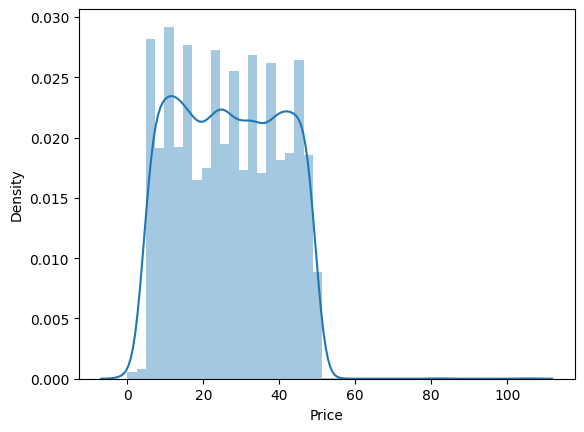

In [65]:
#use seaborn price column
sns.distplot(df_clean['Price'])

In [66]:
from scipy.stats import skew

# Calculate skewness
skewness = df_clean['Price'].skew()

print(f"Skewness: {skewness}")
if skewness > 0:
    print("The data is right-skewed (positively skewed).")
elif skewness < 0:
    print("The data is left-skewed (negatively skewed).")
else:
    print("The data is symmetrical.")


Skewness: 0.059699978454325335
The data is right-skewed (positively skewed).


result data right-skewed


*   Mean>Median> Mode



# **Mode Price**

In [67]:
# Get the mode(s) - most frequent value(s)
price_mode = df_clean['Price'].mode()

print("Mode(s) of Price column:")
print(price_mode.to_string(index=False))

# Get top 10 most frequent prices
price_freq = df_clean['Price'].value_counts().head(10)

print("\nTop 10 most frequent prices:")
print(price_freq.to_string())

# # Additional statistics
print(f"\nNumber of modes: {len(price_mode)}")
print(f"Highest frequency: {price_freq.max()} occurrences")
print(f"\nComplete value counts (sorted by frequency):")
print(df_clean['Price'].value_counts().to_string())

Mode(s) of Price column:
12.0

Top 10 most frequent prices:
Price
12.0    163
26.0    162
5.0     157
33.0    156
13.0    156
10.0    155
43.0    155
39.0    154
9.0     154
24.0    152

Number of modes: 1
Highest frequency: 163 occurrences

Complete value counts (sorted by frequency):
Price
12.0     163
26.0     162
5.0      157
33.0     156
13.0     156
10.0     155
43.0     155
39.0     154
9.0      154
24.0     152
6.0      150
17.0     150
28.0     149
14.0     148
8.0      148
40.0     147
47.0     147
25.0     146
16.0     146
48.0     146
21.0     145
46.0     145
11.0     143
36.0     143
42.0     141
15.0     141
49.0     140
22.0     140
41.0     140
30.0     139
23.0     139
44.0     138
7.0      138
32.0     136
37.0     134
45.0     134
31.0     134
18.0     133
29.0     133
34.0     132
20.0     131
35.0     127
19.0     127
38.0     126
27.0     121
4.0       12
0.0        7
2.0        2
3.0        1
105.0      1
82.0       1
54.0       1
53.0       1


In [68]:
def categorize_rating(rating):
    rating = float(rating)
    if rating < 4.0:
        return 'Low'
    elif 4.0 <= rating < 4.6:
        return 'Medium'
    else:
        return 'High'
#add column
df_clean['Rating_Category'] = df_clean['User Rating'].apply(categorize_rating)

<ipython-input-68-d31c2fd34ad4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Rating_Category'] = df_clean['User Rating'].apply(categorize_rating)


In [69]:
df_clean.sample(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Rating_Category
6340,the complete ketogenic diet for beginners,Brené Brown,4.9,18005,NaN,2012,Fiction,High
983,enchanted forest an,James Dashner,4.3,1687,47.0,2013,Non Fiction,Medium
3246,the twilight saga,Adult Coloring Books,4.8,9670,28.0,2012,Fiction,High
2142,goodnight moon,Rh Disney,3.9,12417,49.0,2012,Non Fiction,Low
1511,sarahs key,Joel Fuhrman MD,3.70,42321,NaN,2016,Non Fiction,Low


In [70]:
# know ['User Rating'] < "4.0"
Low_Reviews=df_clean[(df_clean['User Rating'] < "4.0")]
Low_Reviews

,Name,Author,User Rating,Reviews,Price,Year,Genre,Rating_Category
106,fifty shades of,E L James,3.8,47265,14.0,2012,Fiction,Low
353,the casual vacancy,J.k. Rowling,3.3,9372,12.0,2012,Fiction,Low
392,the goldfinch a novel,Donna Tartt,3.9,33844,20.0,<NA>,Fiction,Low
553,the dukan diet,Michael Lewis,3.5,25256,27.0,2017,Non Fiction,Low
560,where the wild things are,John Grisham,3.8,<NA>,14.0,2019,Non Fiction,Low
...,...,...,...,...,...,...,...,...
10333,little blue truck,Edward Klein,3.5,15346,25.0,2017,Fiction,Low
10350,last week tonight,Christina Baker Kline,3.6,12864,6.0,2009,NaN,Low
10415,milk and vine,Audrey Niffenegger,3.50,26690,31.0,<NA>,Fiction,Low
10430,food rules an,Lysa Terkeurst,3.70,482,18.0,2012,Non Fiction,Low


result 2055 rows × 8 columns

In [71]:
Low_Reviews["Reviews"].median()# median for ['User Rating'] < "4.0"

np.float64(24573.5)

In [72]:
Low_Reviews["Price"].sum()# sum for ['User Rating'] < "4.0"

np.float64(50012.0)

In [73]:
#know  ['User Rating'] > "4.0" and  ['User Rating'] < "4.6"
Avg_Reviews=df_clean[(df_clean['User Rating'] >= "4.0") & (df_clean['User Rating'] <= "4.5")]
Avg_Reviews

,Name,Author,User Rating,Reviews,Price,Year,Genre,Rating_Category
5,a dance with,George R.r. Martin,4.4,12643,11.0,2011,Fiction,Medium
13,a wrinkle in,Madeleine L'engle,4.5,5153,5.0,2018,Fiction,Medium
17,adult coloring books,Blue Star Coloring,4.4,2951,6.0,2015,Non Fiction,Medium
18,adult coloring books,Adult Coloring Books,4.5,<NA>,8.0,<NA>,Non Fiction,Medium
27,autobiography of mark,Mark Twain,4.2,491,NaN,2010,Non Fiction,Medium
...,...,...,...,...,...,...,...,...
10225,instant pot pressure,Jennifer Smith,4.40,7396,13.0,2019,Fiction,Medium
10253,go the f*ck to sleep,Joel Fuhrman MD,4.20,44744,39.0,2012,Fiction,Medium
10271,winter of the world,Michael Pollan,4.1,<NA>,32.0,2019,Non Fiction,Medium
10440,you are a,Craig Smith,4.2,49557,11.0,2009,Fiction,Medium


result 2792 rows × 8 columns

In [74]:
Avg_Reviews["Price"].sum() # sum ['User Rating'] > "4.0" and  ['User Rating'] < "4.6"

np.float64(67595.0)

In [75]:
Avg_Reviews["Reviews"].median()# median ['User Rating'] > "4.0" and  ['User Rating'] < "4.6"

np.float64(24248.5)

In [76]:
df_clean["Reviews"].median()# median all data

np.float64(24001.0)

In [77]:
#know ['User Rating'] >= "4.6"
High_Reviews=df_clean[(df_clean['User Rating'] >= "4.6")]
High_Reviews

,Name,Author,User Rating,Reviews,Price,Year,Genre,Rating_Category
0,10-day green smoothie,J.j. Smith,4.7,17350,8.0,2016,Non Fiction,High
2,12 rules for,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction,High
3,1984 signet classics,George Orwell,4.7,21424,6.0,2017,Fiction,High
6,a game of,George R.r. Martin,4.7,<NA>,30.0,2014,Fiction,High
7,a gentleman in,Amor Towles,4.7,19699,15.0,2017,Fiction,High
...,...,...,...,...,...,...,...,...
10281,wonder,R. J. Palacio,4.80,21625,9.0,2015,Fiction,High
10384,the plant paradox,Ta-Nehisi Coates,4.70,30633,14.0,2019,Non Fiction,High
10437,the meltdown,Mark Twain,4.60,<NA>,40.0,2012,Non Fiction,High
10471,wrecking ball,Christopher Paolini,4.9,16079,24.0,2012,Non Fiction,High


result 2318 rows - 8 columns

In [78]:
High_Reviews["Reviews"].median()#median ['User Rating'] >= "4.6"

np.float64(23242.5)

In [79]:
# use fillna price column median
df_clean["Price"]=df_clean["Price"].fillna(df_clean["Price"].median())

<ipython-input-79-680062c79d29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Price"]=df_clean["Price"].fillna(df_clean["Price"].median())


In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 10493
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7192 non-null   object 
 1   Author           7192 non-null   object 
 2   User Rating      7192 non-null   object 
 3   Reviews          6458 non-null   Int64  
 4   Price            7192 non-null   float64
 5   Year             6476 non-null   object 
 6   Genre            6318 non-null   object 
 7   Rating_Category  7192 non-null   object 
dtypes: Int64(1), float64(1), object(6)
memory usage: 512.7+ KB


In [81]:
# fillna median, rounding the median to the nearest integer
df_clean["Reviews"] = df_clean["Reviews"].fillna(round(df_clean["Reviews"].median()))

<ipython-input-81-d43be3f350c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Reviews"] = df_clean["Reviews"].fillna(round(df_clean["Reviews"].median()))


In [82]:
#check all columns null
df_clean.isnull().sum().sort_values()


,0
Name,0
Author,0
User Rating,0
Reviews,0
Price,0
Rating_Category,0
Year,716
Genre,874


In [83]:
High_Reviews["Genre"].value_counts(dropna=False)#count Non Fiction - Fiction

,count
Genre,
Non Fiction,1025
Fiction,1003
NaN,290


In [84]:
Low_Reviews["Genre"].value_counts(dropna=False)#count Non Fiction - Fiction

,count
Genre,
Non Fiction,928
Fiction,897
NaN,230


In [85]:
Avg_Reviews["Genre"].value_counts(dropna=False)#count Non Fiction - Fiction

,count
Genre,
Non Fiction,1236
Fiction,1210
NaN,346


(High-Low- Avg) Non Fiction > Fiction

In [86]:
df_clean["Genre"]=df_clean["Genre"].ffill()#use fill  in null
df_clean["Genre"].value_counts(dropna=False)


<ipython-input-86-9dbd654fb334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Genre"]=df_clean["Genre"].ffill()#use fill  in null


,count
Genre,
Non Fiction,3631
Fiction,3561


result Non Fiction > Fiction and no find null

In [87]:
df_clean.duplicated().sum()

np.int64(0)

In [88]:
df_clean["Year"]=df_clean["Year"].ffill()#use ffill null

<ipython-input-88-c0a777ad9861>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Year"]=df_clean["Year"].ffill()#use ffill null


In [89]:
df_clean["Year"].value_counts(dropna=False)# check null

,count
Year,
2011,704
2012,678
2015,677
2013,669
2010,664
2009,653
2016,643
2017,639
2019,630


result zero null

In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 10493
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7192 non-null   object 
 1   Author           7192 non-null   object 
 2   User Rating      7192 non-null   object 
 3   Reviews          7192 non-null   Int64  
 4   Price            7192 non-null   float64
 5   Year             7192 non-null   object 
 6   Genre            7192 non-null   object 
 7   Rating_Category  7192 non-null   object 
dtypes: Int64(1), float64(1), object(6)
memory usage: 512.7+ KB


In [91]:
# Calculate IQR Anomaly Detection Values

q1 = np.quantile(df_clean['Price'], 0.25)
q3 = np.quantile(df_clean['Price'], 0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'lower limit = {lower_bound} and upper limit = {upper_bound}')

df_clean['IQR Price'] = np.where((df_clean['Price'] < lower_bound) | (df_clean['Price'] > upper_bound), 1, 0)

lower limit = -15.5 and upper limit = 68.5


<ipython-input-91-ab42543902a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['IQR Price'] = np.where((df_clean['Price'] < lower_bound) | (df_clean['Price'] > upper_bound), 1, 0)


lower limit = -15.5 and upper limit = 68.5

In [92]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7192 non-null   object 
 1   Author           7192 non-null   object 
 2   User Rating      7192 non-null   object 
 3   Reviews          7192 non-null   Int64  
 4   Price            7192 non-null   float64
 5   Year             7192 non-null   object 
 6   Genre            7192 non-null   object 
 7   Rating_Category  7192 non-null   object 
 8   IQR Price        7192 non-null   int64  
dtypes: Int64(1), float64(1), int64(1), object(6)
memory usage: 568.9+ KB


In [93]:
df_clean['IQR Price'].value_counts()# count IQR

,count
IQR Price,
0,7190
1,2


result in 2 values IQR

In [94]:
df_clean["IQR Price"]=df_clean["IQR Price"].astype(str)#change type str

<ipython-input-94-2bc996ad5a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["IQR Price"]=df_clean["IQR Price"].astype(str)#change type str


# **Analysis**

# **What is price outlier detection in books?**

In [95]:
px.box(data_frame=df_clean, y='Price', title='Outlier Price')

price values are 82 and 105 IQR

# **What is Reviews outlier detection in books?**

In [96]:
px.box(data_frame=df_clean, y='Reviews', title='Outlier Reviews')


# **What is high reviews per year?**

In [97]:
reviews_per_year = df_clean.pivot_table(values='Reviews', index='Year', aggfunc='sum').reset_index()
px.line(reviews_per_year, x='Year', y='Reviews', title='Total Reviews per Year')

High year 2011

# **What is genre outlier detection in books?**

In [98]:
px.box(df_clean, x='Genre', y='Price', title='Distribution Genre')

price values are 82 and 105 IQR type Non-Fiction


# **What is a high number of books published per year?**

In [99]:
books_per_year = df_clean['Year'].value_counts().reset_index()
books_per_year.columns = ['Year', 'Count']
px.bar(books_per_year, x='Year', y='Count', title='Books Published per Year',color='Year')

high number of books published per year
*   max 2011 - 2015
*   min 2014




# **What is a high number of prices per year?**

In [100]:
px.box(df_clean, x='Year', y='Price', title='Price Distribution by Year', color='Year')

high price

*  price 82 during 2009
*  price 105 during 2013




*   min price starts 0 to 5 during years
*   median all years 26





*   max price of 49 the most years









# **What is the average price by rating category?**

In [101]:
# Calculate average price by rating category
avg_price_rating = df_clean.pivot_table(
    values='Price',
    index='Rating_Category',
    aggfunc='sum'
).reset_index()

colors = {
    'High': '#4C78A8',
    'Medium': '#F58518',
    'Low': '#E45756'
}

# Create the bar chart
fig = px.bar(
    avg_price_rating,
    x='Rating_Category',
    y='Price',
    title='<b>Total Price by Rating Category</b>',
    color='Rating_Category',
    color_discrete_map=colors,
    text='Price',
    labels={'Price': 'Average Price (USD)', 'Rating_Category': 'Rating Category'},
    category_orders={'Rating_Category': ['Low', 'Medium', 'High']}  # Force order
)

# Customize layout
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Rating Category',
    yaxis_title='Total Price (USD)',
    showlegend=False,  # Hide legend (x-axis labels suffice)
    hovermode='x',     # Clean hover tooltips
    title_x=0.5        # Center-align title
)

# Format bars and text
fig.update_traces(
    texttemplate='$%{text:.2f}',  # Show price with 2 decimals
    textposition='outside',       # Place text above bars
    marker_line_color='black',    # Add border to bars
    marker_line_width=1           # Border thickness
)

fig.show()

total price that Medium > High > Low

# **What is a high compare type genre ?**

In [102]:
genre_counts = df_clean['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
px.pie(genre_counts, names='Genre', values='Count', title='Genre Distribution')

Non Fiction > Fiction

# **What are the Top 3 Most Expensive Books?**

In [103]:

# Group by 'Name' and get the maximum price for each book
most_expensive_books = df_clean.groupby('Name')['Price'].max().sort_values(ascending=False).head(3)

# Get full details of the top 5 books
top_3_books_details = (
    df_clean[df_clean['Name'].isin(most_expensive_books.index)]
    .sort_values('Price', ascending=False)
    .drop_duplicates(subset=['Name'])
    .head(3)
)

print("\nTop 3 Most Expensive Books (Details):")
print(top_3_books_details[['Name', 'Author', 'Price', 'Year', 'User Rating']])

fig = px.bar(
    top_3_books_details,
    x='Name',
    y='Price',
    title='<b>Top 3 Most Expensive Books</b>',
    color='Price',  # Color bars by price (gradient)
    color_continuous_scale='Viridis',  # Use 'Viridis' palette (like Seaborn)
    hover_data=['Author', 'Year', 'User Rating'],  # Show extra details on hover
    labels={'Price': 'Price ($)', 'Name': 'Book Title'},
    text='Price',  # Display price on bars
)

# Customize layout
fig.update_layout(
    xaxis_title="Book Title",
    yaxis_title="Price ($)",
    title_x=0.5,  # Center title
    hovermode="x unified",  # Better hover interactions
    xaxis={'categoryorder': 'total descending'},  # Sort bars by price
)

# Rotate x-axis labels and adjust text position
fig.update_traces(
    texttemplate='$%{text:.2f}',  # Format price display
    textposition='outside',
)

fig.update_xaxes(tickangle=45)  # Rotate labels for readability

fig.show()


Top 3 Most Expensive Books (Details):
                                  Name                              Author  \
69   diagnostic and statistical manual  American Psychological Association   
473                  the twilight saga                     Stephenie Meyer   
151            hamilton the revolution                  Lin-Manuel Miranda   

     Price  Year User Rating  
69   105.0  2013         4.5  
473   82.0  2009         4.7  
151   54.0  2016         4.9  


# **What is the yearly (total - average) price?**

In [104]:
yearly_total_price = df_clean.pivot_table(values='Price', index='Year', aggfunc='sum').reset_index()
#px.line(yearly_total_price, x='Year', y='Price', title='Yearly Total Price Trend')

In [105]:
fig = px.line(
    yearly_total_price,
    x='Year',
    y='Price',
    title='Yearly Total Price and Average',
    markers=True,
    template='plotly_dark'
)
fig.add_hline(
    y=yearly_total_price['Price'].median(),
    line_dash="dot",
    annotation_text=f'Median Price: {yearly_total_price["Price"].median():.2f}'
)
fig.show()

In [106]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6467 entries, 0 to 10493
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6467 non-null   object 
 1   Author       6467 non-null   object 
 2   User Rating  6467 non-null   object 
 3   Reviews      5807 non-null   Int64  
 4   Price        6467 non-null   float64
 5   Year         5817 non-null   object 
 6   Genre        5692 non-null   object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 410.5+ KB


In [107]:
df_filter.isnull().sum()

,0
Name,0
Author,0
User Rating,0
Reviews,660
Price,0
Year,650
Genre,775


In [108]:
df_filter.describe()

,Reviews,Price
count,5807.0,6467.000000
mean,24256.871018,26.707592
std,14608.304074,13.215505
min,58.0,0.000000
25%,11501.5,15.000000
50%,23885.0,26.000000
75%,36890.0,38.000000
max,79446.0,105.000000


In [109]:
df_filter["Price"].sum()

np.float64(172718.0)

<ipython-input-110-61d1dacc6033>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

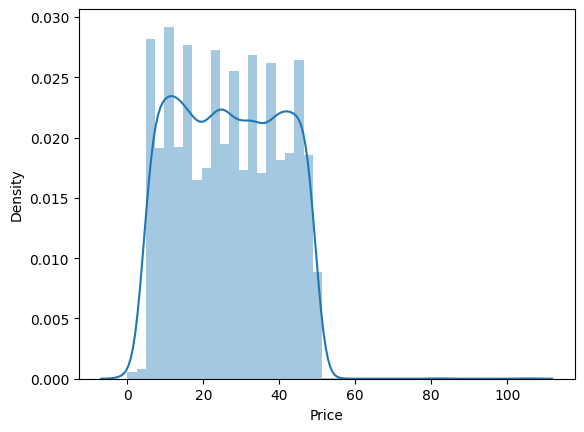

In [110]:
#use seaborn price column
sns.distplot(df_filter['Price'])

In [111]:
from scipy.stats import skew

# Calculate skewness
skewness = df_filter['Price'].skew()

print(f"Skewness: {skewness}")
if skewness > 0:
    print("The data is right-skewed (positively skewed).")
elif skewness < 0:
    print("The data is left-skewed (negatively skewed).")
else:
    print("The data is symmetrical.")


Skewness: 0.05969997845432536
The data is right-skewed (positively skewed).


In [112]:
# Get the mode(s) - most frequent value(s)
price_mode = df_filter['Price'].mode()

print("Mode(s) of Price column:")
print(price_mode.to_string(index=False))

# Get top 10 most frequent prices
price_freq = df_filter['Price'].value_counts().head(10)

print("\nTop 10 most frequent prices:")
print(price_freq.to_string())

# # Additional statistics
print(f"\nNumber of modes: {len(price_mode)}")
print(f"Highest frequency: {price_freq.max()} occurrences")
print(f"\nComplete value counts (sorted by frequency):")
print(df_filter['Price'].value_counts().to_string())

Mode(s) of Price column:
12.0

Top 10 most frequent prices:
Price
12.0    163
26.0    162
5.0     157
33.0    156
13.0    156
10.0    155
43.0    155
39.0    154
9.0     154
24.0    152

Number of modes: 1
Highest frequency: 163 occurrences

Complete value counts (sorted by frequency):
Price
12.0     163
26.0     162
5.0      157
33.0     156
13.0     156
10.0     155
43.0     155
39.0     154
9.0      154
24.0     152
6.0      150
17.0     150
28.0     149
14.0     148
8.0      148
40.0     147
47.0     147
25.0     146
16.0     146
48.0     146
21.0     145
46.0     145
11.0     143
36.0     143
42.0     141
15.0     141
49.0     140
22.0     140
41.0     140
30.0     139
23.0     139
44.0     138
7.0      138
32.0     136
37.0     134
45.0     134
31.0     134
18.0     133
29.0     133
34.0     132
20.0     131
35.0     127
19.0     127
38.0     126
27.0     121
4.0       12
0.0        7
2.0        2
3.0        1
105.0      1
82.0       1
54.0       1
53.0       1


In [113]:
def categorize_rating(rating):
    rating = float(rating)
    if rating < 4.0:
        return 'Low'
    elif 4.0 <= rating < 4.6:
        return 'Medium'
    else:
        return 'High'
#add column
df_filter['Rating_Category'] = df_filter['User Rating'].apply(categorize_rating)

<ipython-input-113-f0d886411862>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
df_filter.sample(4)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Rating_Category
2508,grey fifty shades,Craig Smith,3.5,46224,32.0,2013,Fiction,Low
3033,wonder,Ken Follett,4.2,17573,41.0,2018,Fiction,Medium
8624,eat to live,Dinah Bucholz,4.6,49424,38.0,<NA>,Non Fiction,High
7289,creative haven owls,Alice Schertle,4.3,30302,24.0,2013,Fiction,Medium


In [115]:
# Calculate IQR Anomaly Detection Values

q1 = np.quantile(df_filter['Price'], 0.25)
q3 = np.quantile(df_filter['Price'], 0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'lower limit = {lower_bound} and upper limit = {upper_bound}')

df_filter['IQR Filter Price'] = np.where((df_filter['Price'] < lower_bound) | (df_filter['Price'] > upper_bound), 1, 0)

lower limit = -19.5 and upper limit = 72.5


<ipython-input-115-19c5054fb8c1>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
df_filter['IQR Filter Price'].value_counts()# count IQR

,count
IQR Filter Price,
0,6465
1,2


In [117]:
df_filter["IQR Filter Price"]=df_filter["IQR Filter Price"].astype(str)#change type str

<ipython-input-117-8c7cdd8c3bf3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6467 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6467 non-null   object 
 1   Author            6467 non-null   object 
 2   User Rating       6467 non-null   object 
 3   Reviews           5807 non-null   Int64  
 4   Price             6467 non-null   float64
 5   Year              5817 non-null   object 
 6   Genre             5692 non-null   object 
 7   Rating_Category   6467 non-null   object 
 8   IQR Filter Price  6467 non-null   object 
dtypes: Int64(1), float64(1), object(7)
memory usage: 511.5+ KB


# **Analysis**

# **What is price outlier detection in books?**

In [119]:
px.box(data_frame=df_filter, y='Price', title='Outlier Price')

price values are 82 and 105 IQR

# **What is Reviews outlier detection in books?**

In [120]:
px.box(data_frame=df_filter, y='Reviews', title='Outlier Reviews')


# **What is high reviews per year?**

In [121]:
reviews_per_year = df_filter.pivot_table(values='Reviews', index='Year', aggfunc='sum').reset_index()
px.line(reviews_per_year, x='Year', y='Reviews', title='Total Reviews per Year')

High year 2011

# **What is genre outlier detection in books?**

In [122]:
px.box(df_filter, x='Genre', y='Price', title='Distribution Genre')

price value 105 IQR type Non-Fiction

In [123]:
df_filter[df_filter['Price'] > 60]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Rating_Category,IQR Filter Price
69,diagnostic and statistical manual,American Psychological Association,4.5,6679,105.0,2013,Non Fiction,Medium,1
473,the twilight saga,Stephenie Meyer,4.7,3801,82.0,2009,NaN,High,1



# **What is a high number of books published per year?**

In [124]:
books_year = df_filter['Year'].value_counts().reset_index()
books_year.columns = ['Year', 'Count']
px.bar(books_year, x='Year', y='Count', title='Books Published per Year',color='Year')

high number of books published per year
*   max 2011 - 2012
*   min 2017



In [125]:
# Calculate average price by rating category
avg_rating = df_filter.pivot_table(
    values='Price',
    index='Rating_Category',
    aggfunc='sum'
).reset_index()

colors = {
    'High': '#4C78A8',
    'Medium': '#F58518',
    'Low': '#E45756'
}

# Create the bar chart
fig = px.bar(
    avg_rating,
    x='Rating_Category',
    y='Price',
    title='<b>Total Price by Rating Category</b>',
    color='Rating_Category',
    color_discrete_map=colors,
    text='Price',
    labels={'Price': 'Average Price (USD)', 'Rating_Category': 'Rating Category'},
    category_orders={'Rating_Category': ['Low', 'Medium', 'High']}  # Force order
)

# Customize layout
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Rating Category',
    yaxis_title='Total Price (USD)',
    showlegend=False,  # Hide legend (x-axis labels suffice)
    hovermode='x',     # Clean hover tooltips
    title_x=0.5        # Center-align title
)

# Format bars and text
fig.update_traces(
    texttemplate='$%{text:.2f}',  # Show price with 2 decimals
    textposition='outside',       # Place text above bars
    marker_line_color='black',    # Add border to bars
    marker_line_width=1           # Border thickness
)

fig.show()

total price that Medium > High > Low

# **What is a high compare type genre ?**

In [126]:
genre = df_filter['Genre'].value_counts().reset_index()
genre.columns = ['Genre', 'Count']
px.pie(genre, names='Genre', values='Count', title='Genre Distribution')

Non Fiction > Fiction

# **What are the Top 3 Most Expensive Books?**

In [127]:

# Group by 'Name' and get the maximum price for each book
most_expensive_books = df_filter.groupby('Name')['Price'].max().sort_values(ascending=False).head(3)

# Get full details of the top 5 books
top_3_books_details = (
    df_filter[df_filter['Name'].isin(most_expensive_books.index)]
    .sort_values('Price', ascending=False).head(3)
    #.drop_duplicates(subset=['Name'])
    #.head(3)
)

print("\nTop 3 Most Expensive Books (Details):")
print(top_3_books_details[['Name', 'Author', 'Price', 'Year', 'User Rating']])

fig = px.bar(
    top_3_books_details,
    x='Name',
    y='Price',
    title='<b>Top 3 Most Expensive Books</b>',
    color='Price',  # Color bars by price (gradient)
    color_continuous_scale='Viridis',  # Use 'Viridis' palette (like Seaborn)
    hover_data=['Author', 'Year', 'User Rating'],  # Show extra details on hover
    labels={'Price': 'Price ($)', 'Name': 'Book Title'},
    text='Price',  # Display price on bars
)

# Customize layout
fig.update_layout(
    xaxis_title="Book Title",
    yaxis_title="Price ($)",
    title_x=0.5,  # Center title
    hovermode="x unified",  # Better hover interactions
    xaxis={'categoryorder': 'total descending'},  # Sort bars by price
)

# Rotate x-axis labels and adjust text position
fig.update_traces(
    texttemplate='$%{text:.2f}',  # Format price display
    textposition='outside',
)

fig.update_xaxes(tickangle=45)  # Rotate labels for readability

fig.show()


Top 3 Most Expensive Books (Details):
                                  Name                              Author  \
69   diagnostic and statistical manual  American Psychological Association   
473                  the twilight saga                     Stephenie Meyer   
151            hamilton the revolution                  Lin-Manuel Miranda   

     Price  Year User Rating  
69   105.0  2013         4.5  
473   82.0  2009         4.7  
151   54.0  2016         4.9  


# **What is the yearly (total - average) price?**

In [128]:
yearly_total_per_price = df_filter.pivot_table(values='Price', index='Year', aggfunc='sum').reset_index()
#px.line(yearly_total_price, x='Year', y='Price', title='Yearly Total Price Trend')

In [136]:
fig = px.line(
    yearly_total_per_price,
    x='Year',
    y='Price',
    title='Yearly Total Price and Average',
    markers=True,
    template='plotly_dark'
)
fig.add_hline(
    y=yearly_total_per_price['Price'].median(),
    line_dash="dot",
    annotation_text=f'Median Price: {yearly_total_per_price["Price"].median():.2f}'
)
fig.show()

# **Concatenate describe df_clean (no null) and df_filter(null)**

In [130]:
clean_describe=df_clean.describe()
filter_describe=df_filter.describe()
# Concatenate the two describe
merged_describe = pd.concat(
    [clean_describe, filter_describe],
    axis=1,
    keys=['Filtered (df_clean)', 'Original (df_filter)']
)

merged_describe

Filtered (df_clean)              Original (df_filter)             
                  Reviews        Price              Reviews        Price
count              7192.0  7192.000000               5807.0  6467.000000
mean         24249.759872    26.636263         24256.871018    26.707592
std          13829.119603    12.533423         14608.304074    13.215505
min                  58.0     0.000000                 58.0     0.000000
25%              12886.75    16.000000              11501.5    15.000000
50%               24001.0    26.000000              23885.0    26.000000
75%               35292.5    37.000000              36890.0    38.000000
max               79446.0   105.000000              79446.0   105.000000

In [131]:
df_clean["Price"].sum()#total price df_clean

np.float64(191568.0)

In [132]:
df_filter["Price"].sum()#Total price df_filter

np.float64(172718.0)

# **Concatenate Genre df_clean (no null) and df_filter(null)**

In [133]:
df_clean_genre=pd.pivot_table(df_clean,
               values=['Price'],
               columns='Genre',
               aggfunc={
                       'Price': ["sum"]})
#df_clean_genre
df_filter_genre=pd.pivot_table(df_filter,
               values=['Price'],
               columns='Genre',
               aggfunc={
                       'Price': ["sum"]})
#df_filter_genre
# Merge the two pivot
merged_genre_comparison = pd.concat(
    [df_clean_genre, df_filter_genre],
    axis=1,
    keys=[ 'Filtered (df_clean)','Original (df_filter)']
)

merged_genre_comparison

Filtered (df_clean)             Original (df_filter)            
Genre                 Fiction Non Fiction              Fiction Non Fiction
Price sum             94784.0     96784.0              75092.0     77074.0

# **Concatenate Rating Category  df_clean (no null) and df_filter(null)**

In [134]:
# For df_clean
avg_price_clean = df_clean.pivot_table(
    values='Price',
    index='Rating_Category',
    aggfunc=['sum']
)

# For df_filter
avg_price_filter = df_filter.pivot_table(
    values='Price',
    index='Rating_Category',
    aggfunc=['sum']
)
merged_rating_comparison = pd.concat(
    [avg_price_clean, avg_price_filter],
    axis=1,
    keys=['Filter (df_clean)', 'Original (df_filter)']
)

merged_rating_comparison

,Filter (df_clean),Original (df_filter)
,sum,sum
,Price,Price
Rating_Category,,
High,60229.0,54275.0
Low,55446.0,50012.0
Medium,75893.0,68431.0
